In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Read the CSV file
df=pd.read_csv("energy_dataset.csv")
df1 = pd.read_csv("weather_features1.csv")



In [81]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'],utc =True)
df1['time'] = pd.to_datetime(df1['time'],utc = True,errors='coerce')

# Drop the 'city_name' column
df1 = df1.drop(columns=['city_name'])

# Define aggregation functions including mode calculation
aggregation_functions = {
    "temp": 'mean',
    "temp_min": 'mean',
    "temp_max": 'mean',
    "pressure": 'mean',
    "humidity": 'mean',
    "wind_speed": 'mean',
    "wind_deg": 'mean',
    "rain_1h": 'mean',
    "rain_3h": 'mean',
    "snow_3h": 'mean',
    "clouds_all": 'mean',
    "weather_id": 'mean',
    "weather_main": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    "weather_description": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    "weather_icon": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None
}

# Aggregate the dataset by 'time' column
df2= df1.groupby('time').agg(aggregation_functions).reset_index()




In [82]:
merged_dataset = pd.merge(df,df2,on='time', how='left')

In [83]:
df3 = merged_dataset


In [84]:
df3.shape

(35064, 44)

In [85]:
df3.head

<bound method NDFrame.head of                            time  generation biomass  \
0     2014-12-31 23:00:00+00:00               447.0   
1     2015-01-01 00:00:00+00:00               449.0   
2     2015-01-01 01:00:00+00:00               448.0   
3     2015-01-01 02:00:00+00:00               438.0   
4     2015-01-01 03:00:00+00:00               428.0   
...                         ...                 ...   
35059 2018-12-31 18:00:00+00:00               297.0   
35060 2018-12-31 19:00:00+00:00               296.0   
35061 2018-12-31 20:00:00+00:00               292.0   
35062 2018-12-31 21:00:00+00:00               293.0   
35063 2018-12-31 22:00:00+00:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  wind_speed  wind_deg  rain_1h  rain_3h  \
0                        0.0  ...        2.00    135.20      0.0      0.0   
1                        0.0  ...        2.00    135.80      0.0      0.0   
2                        0.0  ...        2.40    119.00      0.0      0.0   
3                        0.0  ...        2.40    119.20      0.0      0.0   
4                        0.0  ...        2.40    118.40      0.0

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [87]:
# Correct way to drop specific columns from a DataFrame
df3 = df3.drop(columns=["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"])


In [88]:
df3.shape

(35064, 42)

In [89]:
#here this function is called for the null value count
null_counts = df3.isnull().sum()
null_counts



time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [90]:
df3 = df3.fillna(method='bfill')

# Check for remaining NaNs after backfill
print("\nNaN counts after backfill:")
print(df3.isna().sum())


NaN counts after backfill:
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                 

In [91]:
#removing the columns containg zeros value
numeric_cols = df3.select_dtypes(include=['number']).columns

# Identify columns where the sum of all numbers is zero
columns_with_sum_zero = numeric_cols[df3[numeric_cols].sum() == 0].tolist()

# Remove these columns
df4 = df3.drop(columns=columns_with_sum_zero)


In [92]:
df4.shape

(35064, 36)

In [93]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

In [94]:
# Original price (assuming 'price' column contains original prices)
original_prices = df4['price actual']

# Impute missing prices (mean imputation in this example)
mean_price = df4['price actual'].mean()
df4['imputed_price'] = df4['price actual'].fillna(mean_price)

print("Original Prices:")
print(original_prices)
print("\nImputed Prices:")
print(df4['imputed_price'])



Original Prices:
0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, Length: 35064, dtype: float64

Imputed Prices:
0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: imputed_price, Length: 35064, dtype: float64


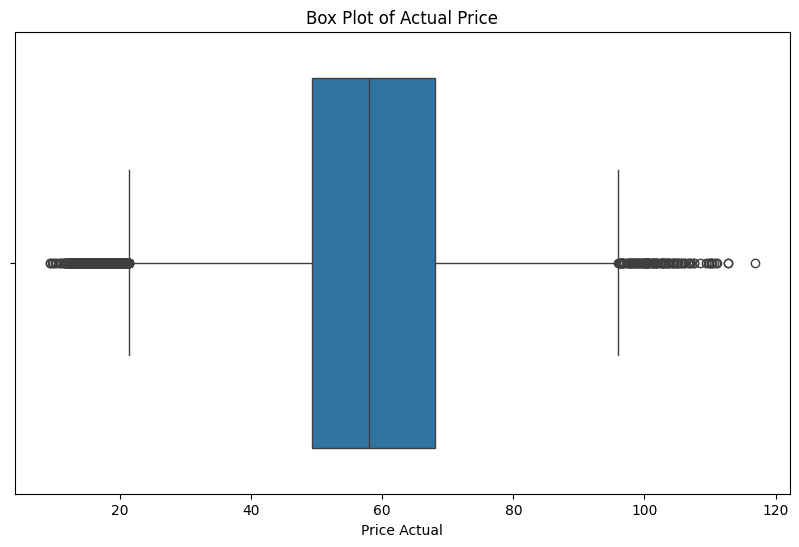

In [95]:
mean_price = df4['price actual'].mean()

# Impute missing prices with the mean
df4['imputed_price'] = df4['price actual'].fillna(mean_price)

# Plotting the box plot for 'price actual'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df4['price actual'])
plt.title('Box Plot of Actual Price')
plt.xlabel('Price Actual')
plt.show()

In [96]:

# Select only numeric columns
numeric_df = df4.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

print("Outliers in DataFrame:\n", outliers)

# Optionally, remove outliers by setting them to NaN
df_no_outliers = numeric_df.mask(outliers)

# Combine the numeric DataFrame with outliers removed back with the non-numeric columns
df_no_outliers = pd.concat([df_no_outliers, df4.select_dtypes(exclude=['number'])], axis=1)

print("DataFrame after removing outliers:\n", df_no_outliers)


Outliers in DataFrame:
        generation biomass  generation fossil brown coal/lignite  \
0                   False                                 False   
1                   False                                 False   
2                   False                                 False   
3                   False                                 False   
4                   False                                 False   
...                   ...                                   ...   
35059               False                                 False   
35060               False                                 False   
35061               False                                 False   
35062               False                                 False   
35063               False                                 False   

       generation fossil gas  generation fossil hard coal  \
0                      False                        False   
1                      False                     

 <span style="font-size: larger;">feature engineering</span>.

categorize the high peak and off peak time

In [97]:
df4["time"] = pd.to_datetime(df4["time"],utc = True)

# Sort DataFrame by time
df4 = df4.sort_values('time')

# Function to categorize peak status based on average of adjacent times
def categorize_time(hour, prev_hour, next_hour):
    if prev_hour is None:
        avg_hour = next_hour
    elif next_hour is None:
        avg_hour = prev_hour
    else:
        avg_hour = (prev_hour + next_hour) / 2

    if hour > avg_hour:
        return 'high_peak'
    else:
        return 'off_peak'

# Calculate previous and next hours for each row
df4['prev_hour'] = df4['time'].shift(1).dt.hour
df4['next_hour'] = df4['time'].shift(-1).dt.hour

# Apply categorization function to create 'peak_status' column
df4['peak_status'] = df4.apply(lambda row: categorize_time(row['time'].hour, row['prev_hour'], row['next_hour']), axis=1)

# Drop intermediate columns used for calculation
df4 = df4.drop(['prev_hour', 'next_hour'], axis=1)

df4['high_peak'] = (df4['peak_status'] == 'high_peak').astype(int)
df4['off_peak'] = (df4['peak_status'] == 'off_peak').astype(int)

# Print DataFrame with 'time', 'high_peak', and 'off_peak' columns
print(df4[['time', 'high_peak', 'off_peak']])

                           time  high_peak  off_peak
0     2014-12-31 23:00:00+00:00          0         1
1     2015-01-01 00:00:00+00:00          0         1
2     2015-01-01 01:00:00+00:00          0         1
3     2015-01-01 02:00:00+00:00          0         1
4     2015-01-01 03:00:00+00:00          0         1
...                         ...        ...       ...
35059 2018-12-31 18:00:00+00:00          0         1
35060 2018-12-31 19:00:00+00:00          0         1
35061 2018-12-31 20:00:00+00:00          0         1
35062 2018-12-31 21:00:00+00:00          0         1
35063 2018-12-31 22:00:00+00:00          0         1

[35064 rows x 3 columns]


categorize the weekdays and weekend

In [98]:

# Function to categorize weekdays and weekends
def categorize_weekday_weekend(day):
    if day < 5:
        return 'weekday'
    else:
        return 'weekend'

# Apply the function to create the 'day_type' column
df4['day_type'] = df4['time'].dt.dayofweek.apply(categorize_weekday_weekend)

# Count the number of days in each category
day_type_counts = df4['day_type'].value_counts()
print("Day Type Counts:")
print(day_type_counts)

# Create separate columns for weekdays and weekends
df4['weekday'] = (df4['time'].dt.dayofweek < 5).astype(int)
df4['weekend'] = (df4['time'].dt.dayofweek >= 5).astype(int)

# Extract day names from the 'time' column
df4['day_name'] = df4['time'].dt.day_name()

# One-hot encode the 'day_name' column
df4 = pd.get_dummies(df4, columns=['day_name'])

# Display the DataFrame with one-hot encoded day names
print("\nDataFrame with Day Names:")
print(df4[['time', 'weekday', 'weekend', 'day_name_Monday', 'day_name_Tuesday', 'day_name_Wednesday', 'day_name_Thursday', 'day_name_Friday', 'day_name_Saturday', 'day_name_Sunday']].head())

# Count the number of days for each day of the week
day_type_counts = df4.filter(like='day_name_').sum()
print("\nDay counts:")
print(day_type_counts)


Day Type Counts:
day_type
weekday    25032
weekend    10032
Name: count, dtype: int64

DataFrame with Day Names:
                       time  weekday  weekend  day_name_Monday  \
0 2014-12-31 23:00:00+00:00        1        0            False   
1 2015-01-01 00:00:00+00:00        1        0            False   
2 2015-01-01 01:00:00+00:00        1        0            False   
3 2015-01-01 02:00:00+00:00        1        0            False   
4 2015-01-01 03:00:00+00:00        1        0            False   

   day_name_Tuesday  day_name_Wednesday  day_name_Thursday  day_name_Friday  \
0             False                True              False            False   
1             False               False               True            False   
2             False               False               True            False   
3             False               False               True            False   
4             False               False               True            False   

   day_name_Sat

one hot encoding for extract the months

In [99]:
# Extract month names from the 'time' column
df4['month_name'] = df4['time'].dt.month_name()

# One-hot encode the 'month_name' column only if columns don't already exist
if 'month_name' in df4.columns:
    df4 = pd.get_dummies(df4, columns=['month_name'])

# Display the DataFrame with one-hot encoded month names
print("\nDataFrame with Month Names:")
print(df4.head())

# Count the number of days for each month
month_count = df4.filter(like='month_name_').sum()
print("\nMonth counts:")
print(month_count)

# Determine high season and off-season months
high_season_months = month_count[month_count >= month_count.mean()]
off_season_months = month_count[month_count < month_count.mean()]

print("\nHigh Season Months:")
print(high_season_months.index.tolist())

print("\nOff-Season Months:")
print(off_season_months.index.tolist())



DataFrame with Month Names:
                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00               447.0   
1 2015-01-01 00:00:00+00:00               449.0   
2 2015-01-01 01:00:00+00:00               448.0   
3 2015-01-01 02:00:00+00:00               438.0   
4 2015-01-01 03:00:00+00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0         

categorization of weather description

In [100]:


# Dictionary mapping weather categories
weather_categories = {
    'Clear': ['clear sky'],
    'Cloudy': ['few clouds', 'scattered clouds', 'broken clouds'],
    'Rainy': ['shower rain', 'rain'],
    'Stormy': ['thunderstorm'],
    'Snowy': ['snow'],
    'Foggy': ['mist', 'fog'],
    'Other': []  # Add any other categories as needed
}

# Function to categorize weather descriptions
def categorize_weather(description, categories):
    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'Other'  # Default category if no match found

# Apply categorization function to create 'weather_category' column
df4['weather_category'] = df4['weather_description'].apply(lambda x: categorize_weather(x, weather_categories))

print(df4[['weather_description', 'weather_category']])


      weather_description weather_category
0            sky is clear            Other
1            sky is clear            Other
2            sky is clear            Other
3            sky is clear            Other
4            sky is clear            Other
...                   ...              ...
35059        sky is clear            Other
35060        sky is clear            Other
35061        sky is clear            Other
35062        sky is clear            Other
35063        sky is clear            Other

[35064 rows x 2 columns]


In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

VISUALIZATION

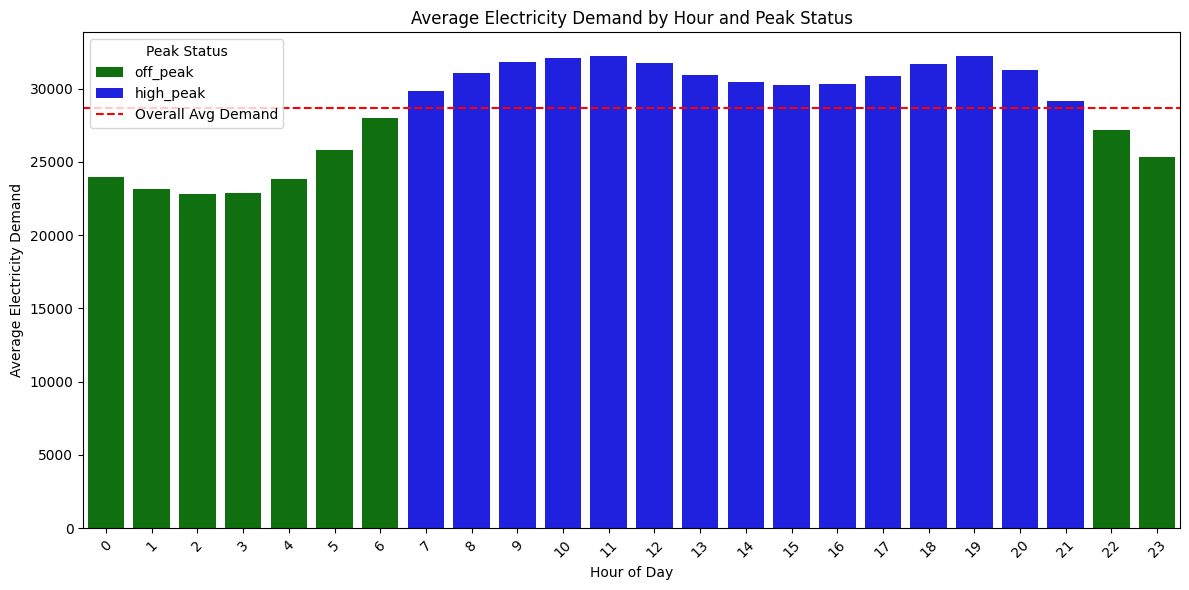

In [102]:
hourly_avg_demand = df4.groupby(df4['time'].dt.hour)['total load actual'].mean().reset_index()
hourly_avg_demand.columns = ['hour', 'avg_electricity_demand']

# Calculate overall average demand across all hours
overall_avg_demand = df4['total load actual'].mean()

# Function to categorize peak status based on overall average demand
def categorize_time(hour, overall_avg_demand):
    if hour > overall_avg_demand:
        return 'high_peak'
    else:
        return 'off_peak'

# Apply categorization function to create 'peak_status' column
hourly_avg_demand['peak_status'] = hourly_avg_demand['avg_electricity_demand'].apply(lambda demand: categorize_time(demand, overall_avg_demand))

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for average electricity demand by hour and peak status
sns.barplot(x='hour', y='avg_electricity_demand', hue='peak_status', data=hourly_avg_demand, palette=['green', 'blue'])

plt.axhline(overall_avg_demand, color='red', linestyle='--', label='Overall Avg Demand')

plt.title('Average Electricity Demand by Hour and Peak Status')
plt.xlabel('Hour of Day')
plt.ylabel('Average Electricity Demand')
plt.legend(title='Peak Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Electricity demand tends to be higher during peak hours (high_peak status) compared to off-peak hours throughout the day. This is particularly noticeable during late afternoon and early evening hours, where demand peaks above the overall average demand indicated by the red dashed line.

barplot for counts od weekdays and weekend

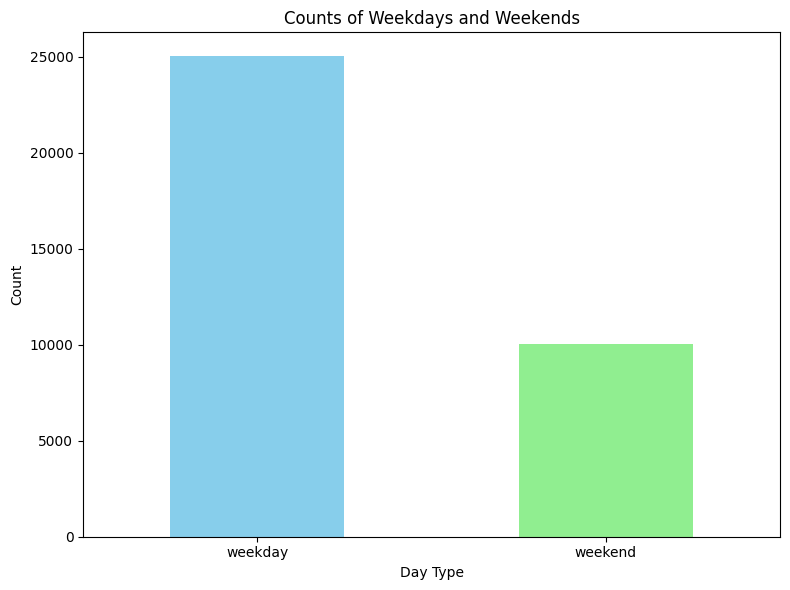

In [103]:
day_type_counts = df4['day_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
day_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

plt.title('Counts of Weekdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()


Weekdays have a notably higher count compared to weekends in the dataset, indicating that there are more data points recorded during typical working days compared to weekends.







piechart for average electricity demand distribution by day of week

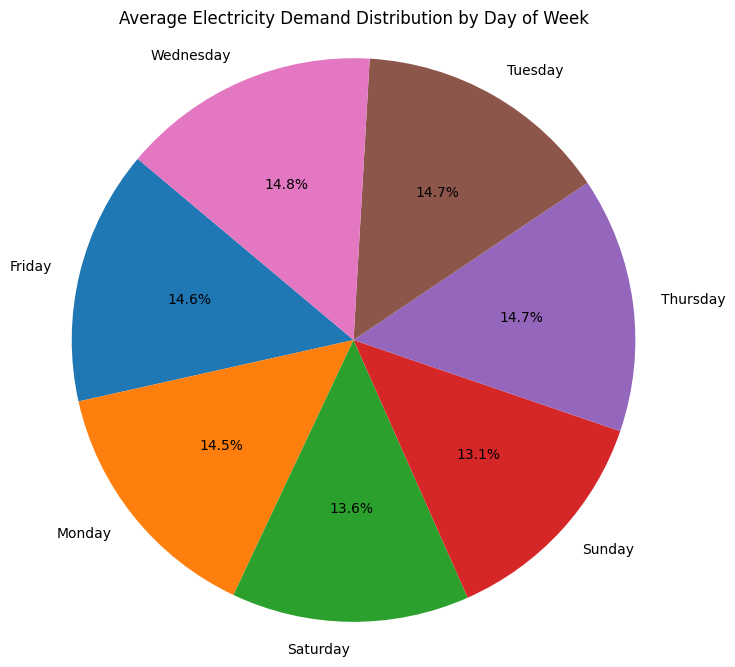

In [104]:
daily_avg_demand = df4.groupby(df4['time'].dt.day_name())['total load actual'].mean().reset_index()
daily_avg_demand.columns = ['day_name', 'avg_electricity_demand']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(daily_avg_demand['avg_electricity_demand'], labels=daily_avg_demand['day_name'], autopct='%1.1f%%', startangle=140)

plt.title('Average Electricity Demand Distribution by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart visually represents the distribution of average electricity demand across different days of the week.

barplot for calcualte the number od days in each month

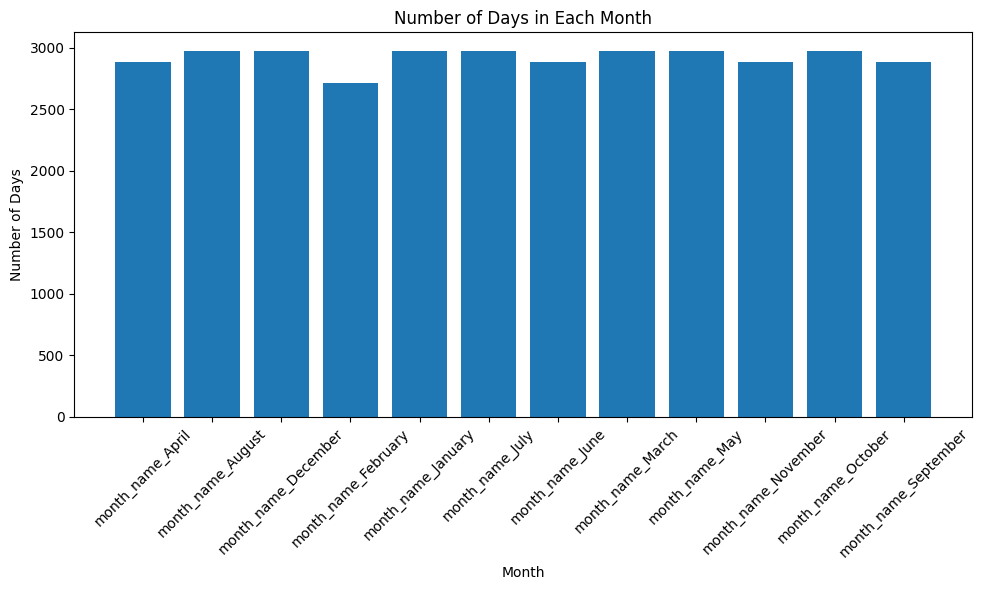

In [105]:
month_count = df4.filter(like='month_name_').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(month_count.index, month_count.values)

plt.title('Number of Days in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot illustrates the variation in the number of days across different months, indicating potential seasonal patterns or variations in data collection over time.

**LINEPLOT FOR HOURLY ELECTRICITY DEMAND**

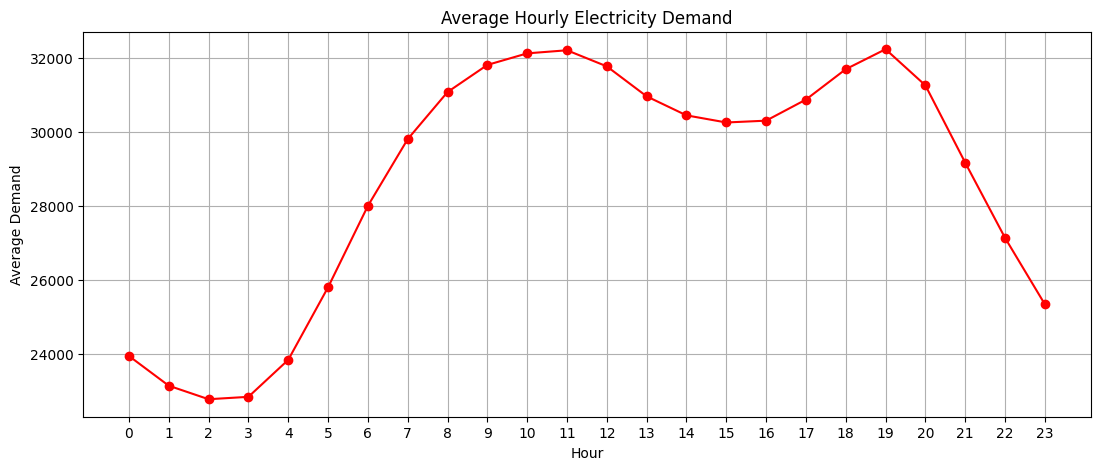

In [27]:
# Ensure 'time' column is of datetime type
merged_dataset['time'] = pd.to_datetime(merged_dataset['time'],utc = True)

# Extract the hour from the 'time' column
merged_dataset['hour'] = merged_dataset['time'].dt.hour

# Calculate the average demand for each hour
hourly_demand = merged_dataset.groupby('hour')['total load actual'].mean()

# Plot the results
plt.figure(figsize=(13, 5))
plt.plot(hourly_demand.index, hourly_demand, marker='o', linestyle='-', color='red')
plt.title('Average Hourly Electricity Demand')
plt.xlabel('Hour')
plt.ylabel('Average Demand')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

lineplot for Total Load Actual for Each Month

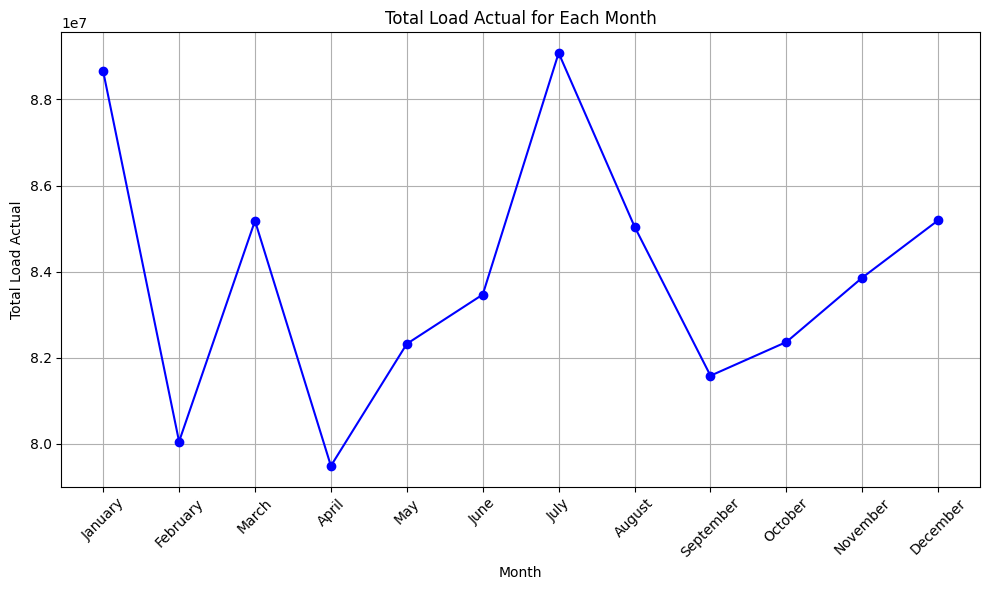

In [106]:
df4['month_name'] = df4['time'].dt.month_name()

# Calculate the total load actual for each month
monthly_load = df4.groupby('month_name')['total load actual'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_load.index, monthly_load.values, marker='o', linestyle='-', color='b')

plt.title('Total Load Actual for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

he plot shows how electricity demand varies throughout the year, with potential peaks during certain months indicating higher energy consumption periods, likely influenced by seasonal factors such as weather conditions or economic activities.







Histogram

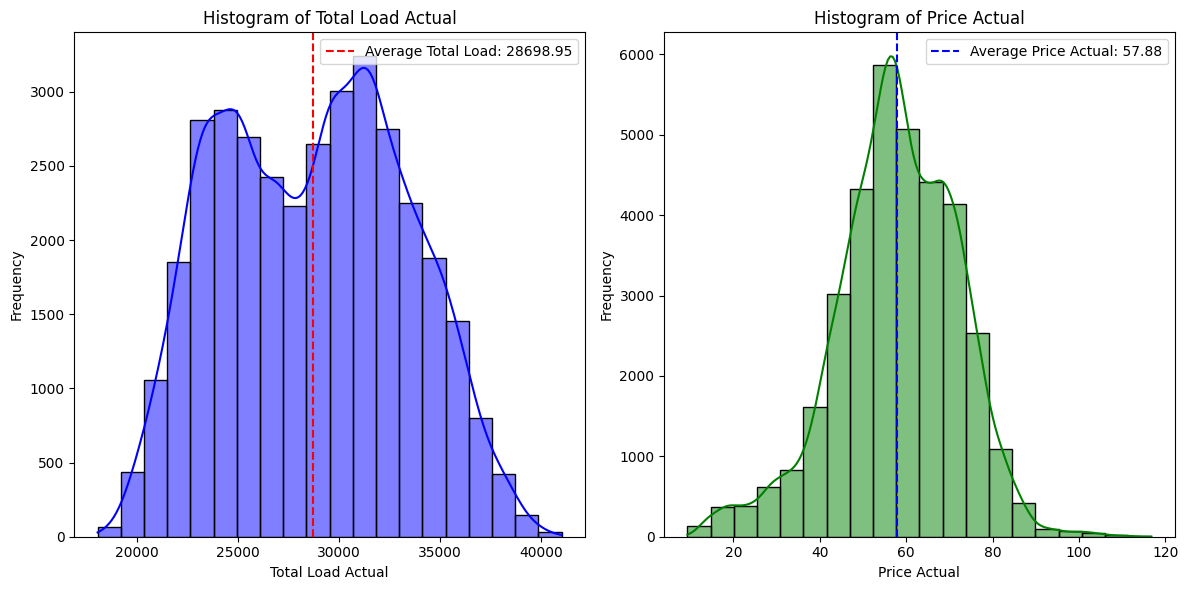

In [107]:
avg_total_load = df4['total load actual'].mean()
avg_price_actual = df4['price actual'].mean()

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for 'total load actual'
plt.subplot(1, 2, 1)
sns.histplot(df4['total load actual'], bins=20, kde=True, color='blue')
plt.axvline(avg_total_load, color='red', linestyle='--', label=f'Average Total Load: {avg_total_load:.2f}')
plt.title('Histogram of Total Load Actual')
plt.xlabel('Total Load Actual')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'price actual'
plt.subplot(1, 2, 2)
sns.histplot(df4['price actual'], bins=20, kde=True, color='green')
plt.axvline(avg_price_actual, color='blue', linestyle='--', label=f'Average Price Actual: {avg_price_actual:.2f}')
plt.title('Histogram of Price Actual')
plt.xlabel('Price Actual')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

These histograms reveal that the distribution of total electricity load shows a moderate skew towards higher values, while the distribution of actual prices appears relatively symmetric with a slight tail towards higher prices.

correlation matrix

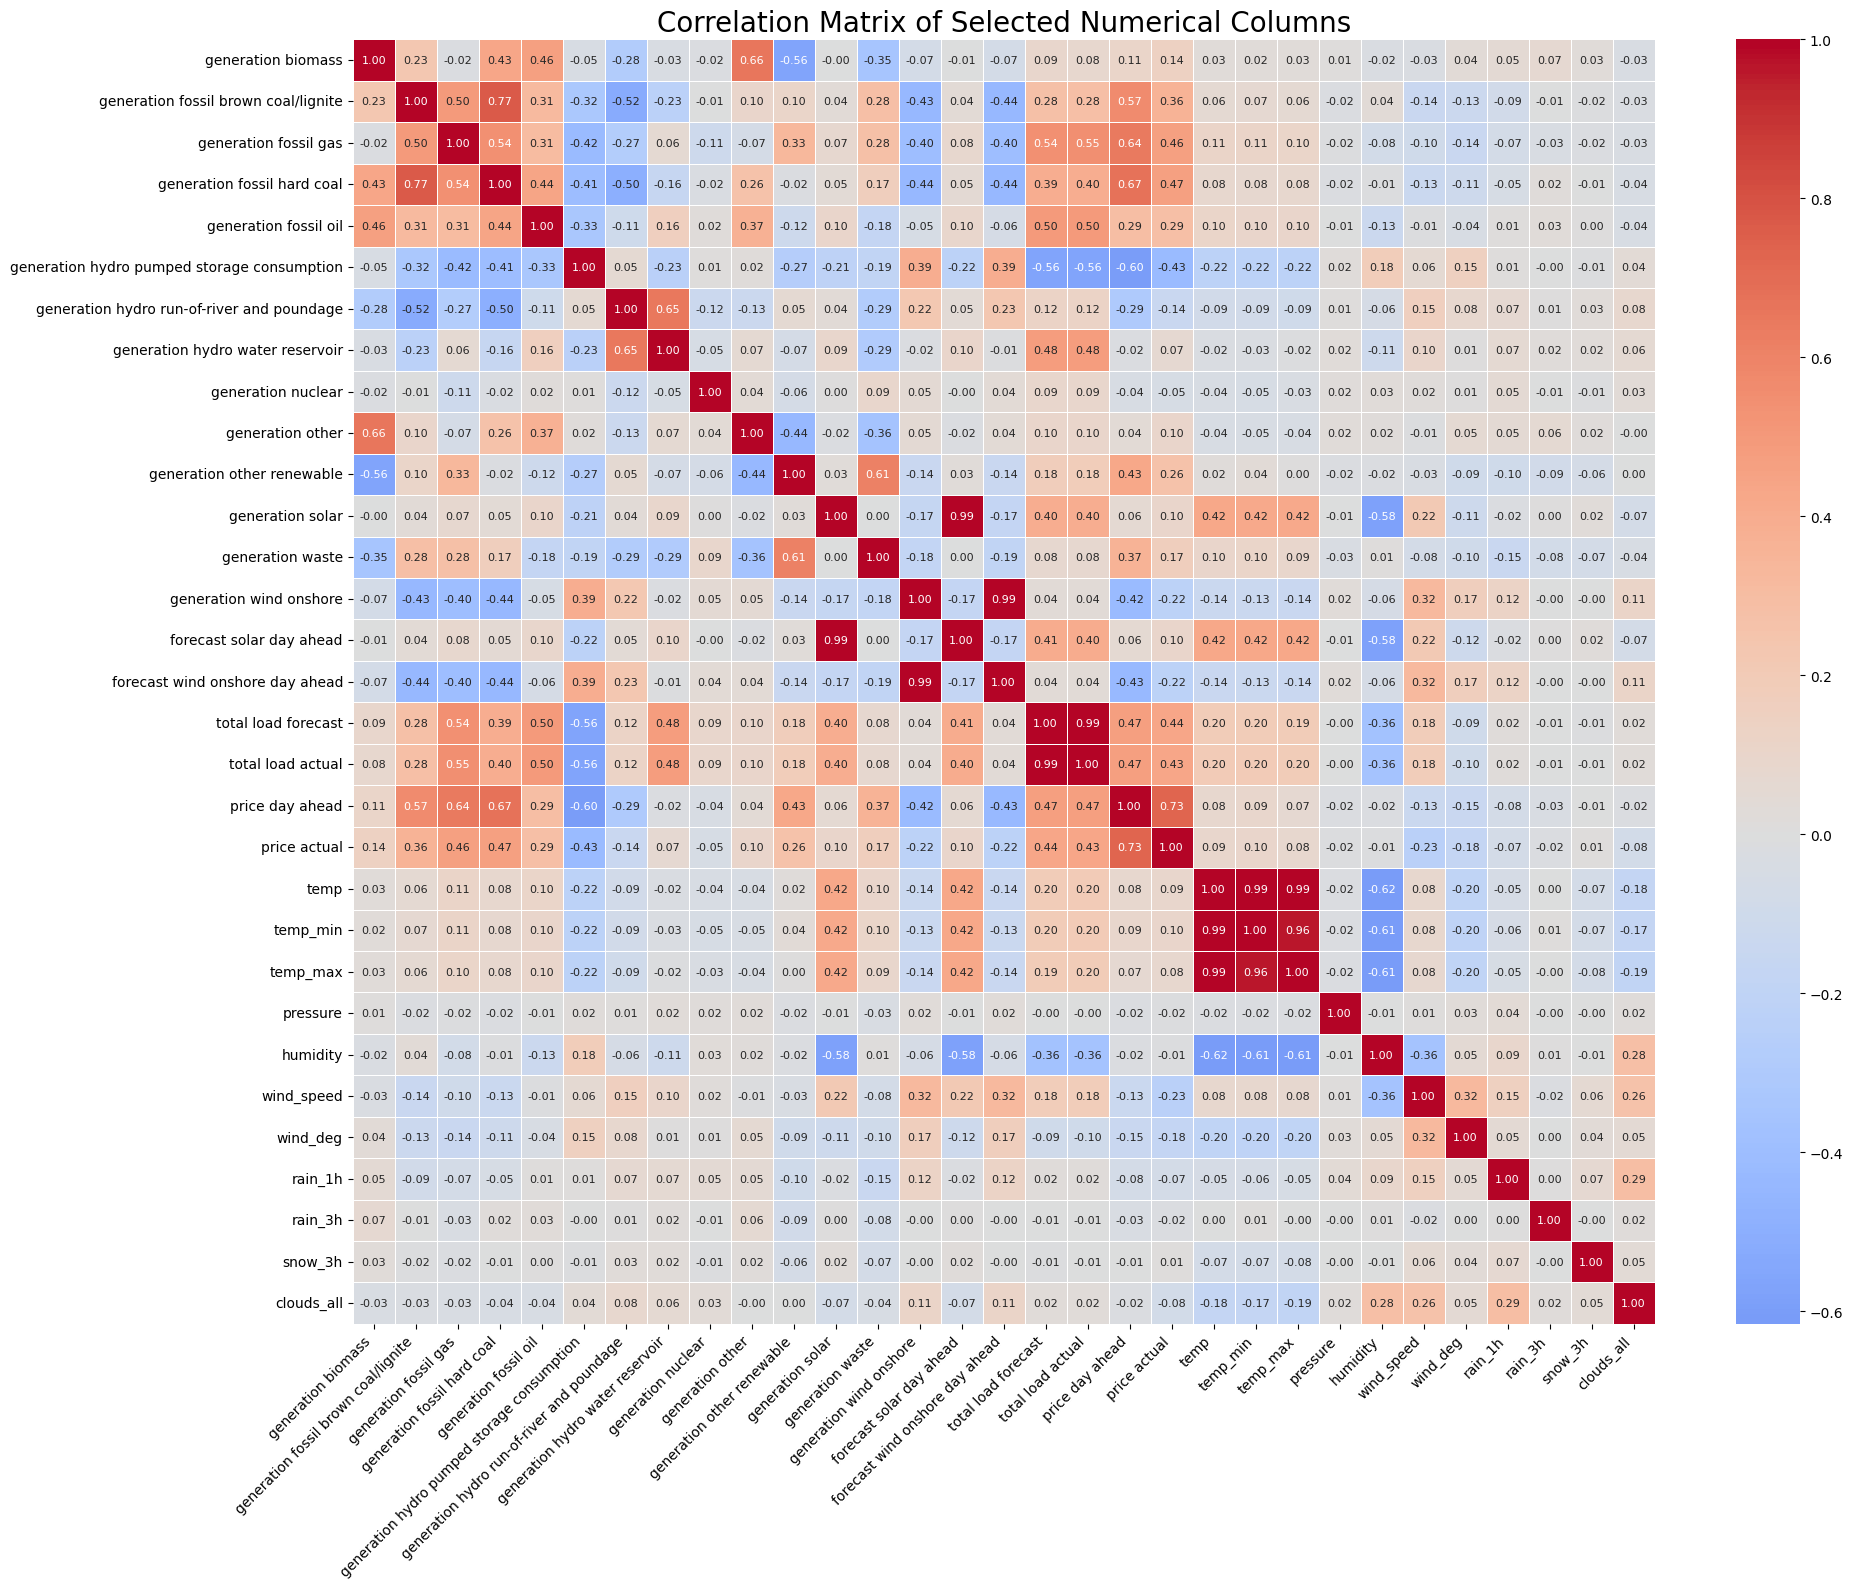

In [108]:
numerical_columns = [
    'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
    'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
    'generation other', 'generation other renewable', 'generation solar', 'generation waste',
    'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead',
    'total load forecast', 'total load actual', 'price day ahead', 'price actual', 'temp', 'temp_min',
    'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all'
]

# Compute correlation matrix
correlation_matrix = df4[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix of Selected Numerical Columns', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The correlation heatmap reveals strong positive correlations between forecasted and actual total loads, indicating accurate predictions. Conversely, variables like temperature and humidity show weaker relationships, suggesting less direct influence on electricity demand.positive correlations between forecasted and actual prices, implying effective forecasting accuracy.

<span style="font-size: larger;">Build the Model</span>.

linear regression model for total load actual

selecting the features from correlation matrix

In [109]:
# Define the threshold for selecting features
threshold = 0.2

# Get the correlation values with the target variable
target_corr = correlation_matrix['total load actual']  # Replace 'target' with your target variable name

# Select features with high correlation to the target variable
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
selected_features.remove('total load actual')  # Remove the target variable itself

print("Selected features based on correlation with target:", selected_features)


Selected features based on correlation with target: ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'humidity']


splitting the model and initializing the model

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_absolute_error

# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'humidity', 'weekday', 'weekend', 'day_name_Sunday']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)

# Split the temporary training set into actual training and validation sets
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f'train dataset shape: {train.shape}')
print(f'validation dataset shape: {validation.shape}')
print(f'test dataset shape: {test.shape}')

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['total load actual']  # Replace 'target' with your actual target variable name

X_validation = validation[features]
y_validation = validation['total load actual']  # Replace 'target' with your actual target variable name

X_test = test[features]
y_test = test['total load actual']  # Replace 'target' with your actual target variable name

# Remove non-numeric columns from X
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_validation_numeric = X_validation.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



train dataset shape: (12272, 64)
validation dataset shape: (12272, 64)
test dataset shape: (10520, 64)


In [33]:
# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Prediction on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Model evaluation on validation set
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2_validation = r2_score(y_validation, y_pred_validation)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)

# Calculate adjusted R-squared for the validation set
n_val = X_validation.shape[0]
p_val = X_validation.shape[1]
adj_r2_validation = 1 - ((1 - r2_validation) * (n_val - 1) / (n_val - p_val - 1))

# Print the evaluation metrics for the validation set
print('Validation set for load:')
print(f'MAE: {mae_validation}')
print(f'RMSE: {rmse_validation}')
print(f'R²: {r2_validation}')
print(f'MAPE: {mape_validation}')
print(f'Adjusted R²: {adj_r2_validation}')

# Blank line between validation and test results
print()

# Prediction on the test set
y_pred_test = model.predict(X_test_scaled)

# Model evaluation on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# Calculate adjusted R-squared for the test set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the evaluation metrics for the test set
print('Test set for load:')
print(f'MAE: {mae_test}')
print(f'RMSE: {rmse_test}')
print(f'R²: {r2_test}')
print(f'MAPE: {mape_test}')
print(f'Adjusted R²: {adj_r2_test}')

Validation set for load:
MAE: 312.7783712141448
RMSE: 436.61293182059563
R²: 0.9909911569431147
MAPE: 0.010853591210220875
Adjusted R²: 0.9909786589561743

Test set for load:
MAE: 312.90780580611886
RMSE: 457.64399872207264
R²: 0.9899201922459206
MAPE: 0.010891394068046496
Adjusted R²: 0.9899038756650961


selecting the features for price actual target value

In [34]:
# Define the threshold for selecting features
threshold = 0.2

# Get the correlation values with the target variable
target_corr = correlation_matrix['price actual']  # Replace 'target' with your target variable name

# Select features with high correlation to the target variable
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
selected_features.remove('price actual')  # Remove the target variable itself

print("Selected features based on correlation with target:", selected_features)


Selected features based on correlation with target: ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'wind_speed']


splitting the data and initialize the model for price actual

In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)

# Split the temporary training set into actual training and validation sets
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f'train dataset shape: {train.shape}')
print(f'validation dataset shape: {validation.shape}')
print(f'test dataset shape: {test.shape}')

# Extract the features and target variables for each set
X_train_lr = train[features]
y_train_lr = train['price actual']

X_validation_lr = validation[features]
y_validation_lr = validation['price actual']

X_test_lr = test[features]
y_test_lr = test['price actual']

# Remove non-numeric columns from X
X_train_numeric = X_train_lr.select_dtypes(include=[np.number])
X_validation_numeric = X_validation_lr.select_dtypes(include=[np.number])
X_test_numeric = X_test_lr.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

train dataset shape: (12272, 64)
validation dataset shape: (12272, 64)
test dataset shape: (10520, 64)


Validation for price actual (Linear Regression)
Validation MAE for price actual: 6.046591155958714
Validation R² for price actual: 0.6237176492665049
Validation Adjusted R² for price actual: 0.6232571209325457
Validation MAPE for price actual: 0.12402071908172244
Validation RMSE for price actual: 8.699481732627987

Test for price actual (Linear Regression)
Test MAE for price actual: 6.239635816883154
Test R² for price actual: 0.6082139155458524
Test Adjusted R² for price actual: 0.6076544342752115
Test MAPE for price actual: 0.12941150046349192
Test RMSE for price actual: 8.935170555513402


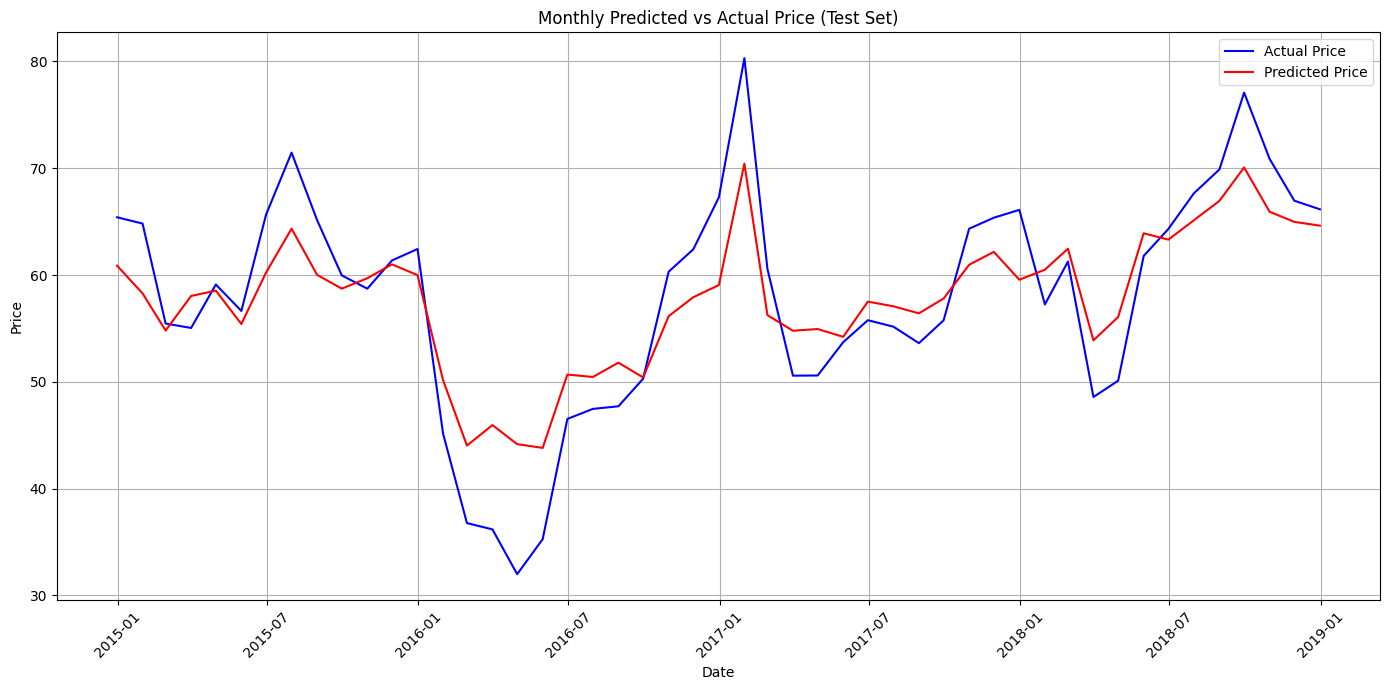

In [113]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train_lr)

# Predict on the validation set
y_pred_validation_lr = lr_model.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation_lr = mean_absolute_error(y_validation_lr, y_pred_validation_lr)
r2_validation_lr = r2_score(y_validation_lr, y_pred_validation_lr)
adjusted_r2_validation_lr = 1 - (1 - r2_validation_lr) * (len(y_validation_lr) - 1) / (len(y_validation_lr) - X_validation_scaled.shape[1] - 1)
mape_validation_lr = mean_absolute_percentage_error(y_validation_lr, y_pred_validation_lr)
rmse_validation_lr = np.sqrt(mean_squared_error(y_validation_lr, y_pred_validation_lr))

print('Validation for price actual (Linear Regression)')
print(f'Validation MAE for price actual: {mae_validation_lr}')
print(f'Validation R² for price actual: {r2_validation_lr}')
print(f'Validation Adjusted R² for price actual: {adjusted_r2_validation_lr}')
print(f'Validation MAPE for price actual: {mape_validation_lr}')
print(f'Validation RMSE for price actual: {rmse_validation_lr}')

# Blank line between validation and test results
print()

# Predict on the test set
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test_lr = mean_absolute_error(y_test_lr, y_pred_test_lr)
r2_test_lr = r2_score(y_test_lr, y_pred_test_lr)
adjusted_r2_test_lr = 1 - (1 - r2_test_lr) * (len(y_test_lr) - 1) / (len(y_test_lr) - X_test_scaled.shape[1] - 1)
mape_test_lr = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_test_lr))

print('Test for price actual (Linear Regression)')
print(f'Test MAE for price actual: {mae_test_lr}')
print(f'Test R² for price actual: {r2_test_lr}')
print(f'Test Adjusted R² for price actual: {adjusted_r2_test_lr}')
print(f'Test MAPE for price actual: {mape_test_lr}')
print(f'Test RMSE for price actual: {rmse_test_lr}')

# Prediction on the test set
y_pred_test = lr_model.predict(X_test_scaled)

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted prices for the test set
results_test_df = pd.DataFrame({
    'time': test['time'],
    'price_actual': y_test_lr,
    'price_predicted': y_pred_test
})

# Resample the data monthly and calculate the mean
results_test_df.set_index('time', inplace=True)
results_test_monthly = results_test_df.resample('M').mean()

# Plotting the results for the test set
plt.figure(figsize=(14, 7))
plt.plot(results_test_monthly.index, results_test_monthly['price_actual'], 'b-', label='Actual Price')
plt.plot(results_test_monthly.index, results_test_monthly['price_predicted'], 'r-', label='Predicted Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

RANDOM FOREST MODEL

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation solar', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'humidity', 'weekday', 'day_name_Sunday','month_name_December','month_name_January','month_name_July']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['total load actual']

X_validation = validation[features]
y_validation = validation['total load actual']

X_test = test[features]
y_test = test['total load actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)



In [119]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Evaluate the model
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
adjusted_r2_validation = 1 - (1 - r2_validation) * (len(y_validation) - 1) / (len(y_validation) - X_validation.shape[1] - 1)
mape_validation = mean_absolute_percentage_error(y_validation, y_pred_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
print(f'Validation for total load actual')
print(f'Validation MAE for load: {mae_validation}')
print(f'Validation R² for load : {r2_validation}')
print(f'Validation Adjusted R² for load: {adjusted_r2_validation}')
print(f'Validation MAPE for load: {mape_validation}')
print(f'Validation RMSE for load: {rmse_validation}')
print()

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test for total load actual')
print(f'Test MAE for load: {mae_test}')
print(f'Test R² for load: {r2_test}')
print(f'Test Adjusted R² for load: {adjusted_r2_test}')
print(f'Test MAPE for load: {mape_test}')
print(f'Test RMSE for load: {rmse_test}')


Validation for total load actual
Validation MAE for load: 308.70814537157753
Validation R² for load : 0.9910875255368978
Validation Adjusted R² for load: 0.9910737043636364
Validation MAPE for load: 0.010731154329139637
Validation RMSE for load: 434.27140460156033

Test for total load actual
Test MAE for load: 310.0318859315589
Test R² for load: 0.9900806686331152
Test Adjusted R² for load: 0.9900627193668322
Test MAPE for load: 0.010805628525644264
Test RMSE for load: 453.9864035752796


RANDOM FOREST FOR PRICE

In [116]:
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable',
            'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual',
            'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)

# Split the temporary training set into actual training and validation sets
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f'train dataset shape: {train.shape}')
print(f'validation dataset shape: {validation.shape}')
print(f'test dataset shape: {test.shape}')

# Extract the features and target variables for each set
X_train_rf = train[features]
y_train_rf = train['price actual']

X_validation_rf = validation[features]
y_validation_rf = validation['price actual']

X_test_rf = test[features]
y_test_rf = test['price actual']

# Remove non-numeric columns from X
X_train_numeric_rf = X_train_rf.select_dtypes(include=[np.number])
X_validation_numeric_rf = X_validation_rf.select_dtypes(include=[np.number])
X_test_numeric_rf = X_test_rf.select_dtypes(include=[np.number])

# Standardize the features
scaler_rf = StandardScaler()

# Fit the scaler on the training data
X_train_scaled_rf = scaler_rf.fit_transform(X_train_numeric_rf)

# Transform the validation and test data using the same scaler
X_validation_scaled_rf = scaler_rf.transform(X_validation_numeric_rf)
X_test_scaled_rf = scaler_rf.transform(X_test_numeric_rf)

train dataset shape: (12272, 64)
validation dataset shape: (12272, 64)
test dataset shape: (10520, 64)


Validation for price actual
Validation MAE for price: 4.462224617014341
Validation R² for price: 0.757527572228344
Validation Adjusted R² for price: 0.7572110027592011
Validation MAPE for price: 0.09203801435903677
Validation RMSE for price: 6.983411547339651

Test for price actual
Test MAE for price: 4.590407414448669
Test R² for price: 0.7496740279566747
Test Adjusted R² for price: 0.7492926878107455
Test MAPE for price: 0.09511543154946828
Test RMSE for price: 7.142188352220828


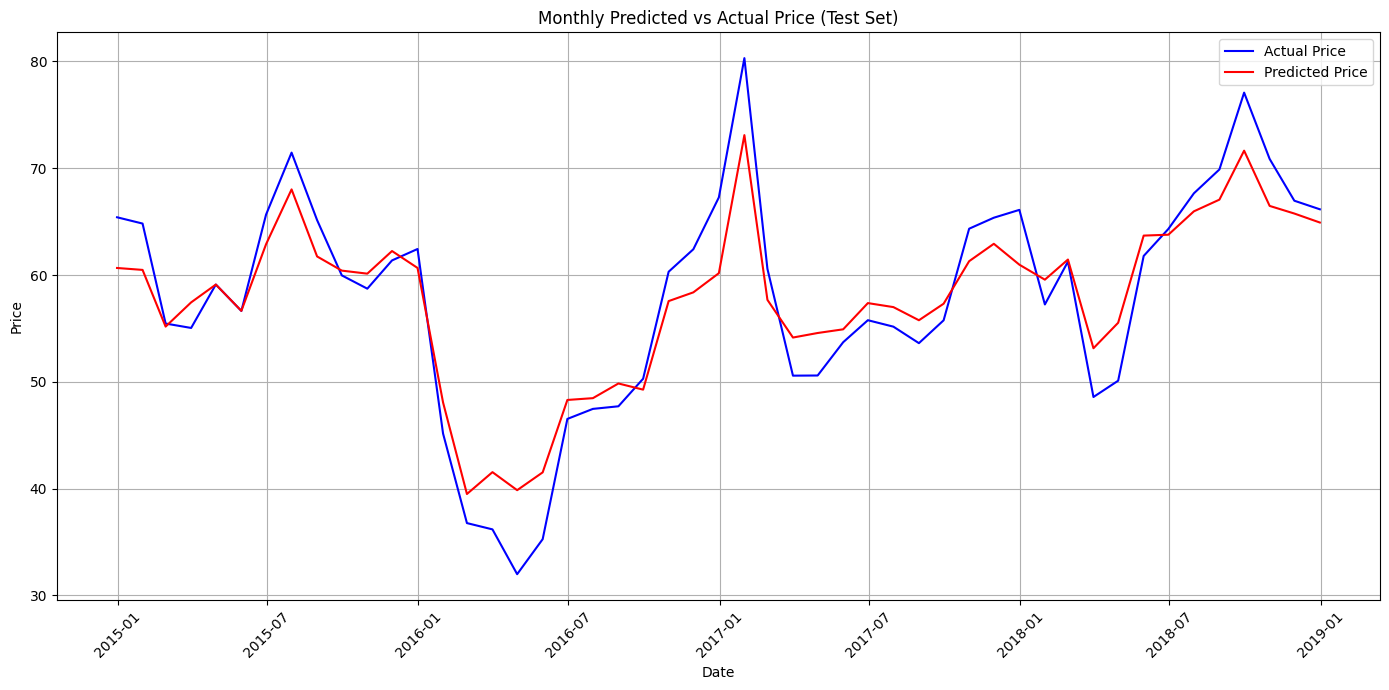

In [117]:
# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled_rf, y_train_rf)

# Predict on the validation set
y_pred_validation_rf = model_rf.predict(X_validation_scaled_rf)

# Evaluate the model on the validation set
mae_validation_rf = mean_absolute_error(y_validation_rf, y_pred_validation_rf)
r2_validation_rf = r2_score(y_validation_rf, y_pred_validation_rf)
adjusted_r2_validation_rf = 1 - (1 - r2_validation_rf) * (len(y_validation_rf) - 1) / (len(y_validation_rf) - X_validation_rf.shape[1] - 1)
mape_validation_rf = mean_absolute_percentage_error(y_validation_rf, y_pred_validation_rf)
rmse_validation_rf = np.sqrt(mean_squared_error(y_validation_rf, y_pred_validation_rf))

print('Validation for price actual')
print(f'Validation MAE for price: {mae_validation_rf}')
print(f'Validation R² for price: {r2_validation_rf}')
print(f'Validation Adjusted R² for price: {adjusted_r2_validation_rf}')
print(f'Validation MAPE for price: {mape_validation_rf}')
print(f'Validation RMSE for price: {rmse_validation_rf}')
print()

# Predict on the test set
y_pred_test_rf = model_rf.predict(X_test_scaled_rf)

# Evaluate the model on the test set
mae_test_rf = mean_absolute_error(y_test_rf, y_pred_test_rf)
r2_test_rf = r2_score(y_test_rf, y_pred_test_rf)
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * (len(y_test_rf) - 1) / (len(y_test_rf) - X_test_rf.shape[1] - 1)
mape_test_rf = mean_absolute_percentage_error(y_test_rf, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_test_rf))

print('Test for price actual')
print(f'Test MAE for price: {mae_test_rf}')
print(f'Test R² for price: {r2_test_rf}')
print(f'Test Adjusted R² for price: {adjusted_r2_test_rf}')
print(f'Test MAPE for price: {mape_test_rf}')
print(f'Test RMSE for price: {rmse_test_rf}')

# Prediction on the test set for plotting
y_pred_test_rf = model_rf.predict(X_test_scaled_rf)

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted prices for the test set
results_test_df_rf = pd.DataFrame({
    'time': test['time'],
    'price_actual': y_test_rf,
    'price_predicted': y_pred_test_rf
})

# Resample the data monthly and calculate the mean
results_test_df_rf.set_index('time', inplace=True)
results_test_monthly_rf = results_test_df_rf.resample('M').mean()

# Plotting the results for the test set
plt.figure(figsize=(14, 7))
plt.plot(results_test_monthly_rf.index, results_test_monthly_rf['price_actual'], 'b-', label='Actual Price')
plt.plot(results_test_monthly_rf.index, results_test_monthly_rf['price_predicted'], 'r-', label='Predicted Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Random Forest with parameter tuning

In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df4 is your dataframe and contains the target variable
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['total load actual']
X_validation = validation[features]
y_validation = validation['total load actual']
X_test = test[features]
y_test = test['total load actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)








In [121]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2,5 ],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [122]:
# Train a Random Forest Regressor model with the best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_validation = model.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)
adjusted_r2_validation = 1 - (1 - r2_validation) * (len(y_validation) - 1) / (len(y_validation) - X_validation.shape[1] - 1)
mape_validation = np.mean(np.abs((y_validation - y_pred_validation) / y_validation))   # Mean Absolute Percentage Error
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))

print('Validation for total load actual')
print(f'Validation MAE for total load actual: {mae_validation}')
print(f'Validation R² for total load actual: {r2_validation}')
print(f'Validation Adjusted R² for total load actual: {adjusted_r2_validation}')
print(f'Validation MAPE for total load actual: {mape_validation}')
print(f'Validation RMSE for total load actual: {rmse_validation}')
print()
# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test))  # Mean Absolute Percentage Error
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Test for total load actual')
print(f'Test MAE for total load actual: {mae_test}')
print(f'Test R² for total load actual: {r2_test}')
print(f'Test Adjusted R² for total load actual: {adjusted_r2_test}')
print(f'Test MAPE for total load actual: {mape_test}')
print(f'Test RMSE for total load actual: {rmse_test}')

Validation for total load actual
Validation MAE for total load actual: 312.4214555873582
Validation R² for total load actual: 0.990927747058872
Validation Adjusted R² for total load actual: 0.9909166436161405
Validation MAPE for total load actual: 0.01083507191284131
Validation RMSE for total load actual: 438.1468151884665

Test for total load actual
Test MAE for total load actual: 313.39502523546247
Test R² for total load actual: 0.9899907793914207
Test Adjusted R² for total load actual: 0.9899764859499576
Test MAPE for total load actual: 0.010898812123257497
Test RMSE for total load actual: 456.0387827470093


Random Forest for price with parameter tuning

In [124]:
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption',
            'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead',
            'total load forecast', 'total load actual', 'price day ahead', 'wind_speed', 'wind_deg',
            'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train_rft = train[features]
y_train_rft = train['price actual']

X_validation_rft = validation[features]
y_validation_rft = validation['price actual']

X_test_rft = test[features]
y_test_rft = test['price actual']

# Remove non-numeric columns from X
X_train_numeric_rft = X_train_rft.select_dtypes(include=[np.number])
X_validation_numeric_rft = X_validation_rft.select_dtypes(include=[np.number])
X_test_numeric_rft = X_test_rft.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_train_scaled_rft = scaler.fit_transform(X_train_numeric_rft)
X_validation_scaled_rft = scaler.transform(X_validation_numeric_rft)
X_test_scaled_rft = scaler.transform(X_test_numeric_rft)


In [125]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled_rft, y_train_rft)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


Validation for price actual
Validation MAE for price: 4.315077086049543
Validation R² for price: 0.7728294599382901
Validation Adjusted R² for price: 0.7725328684539174
Validation MAPE for price: 0.088333698597738
Validation RMSE for price: 6.759467145660547

Test for price actual
Test MAE for price: 4.399176425855513
Test R² for price: 0.7684679656642905
Test Adjusted R² for price: 0.7681152557195727
Test MAPE for price: 0.09061540913344888
Test RMSE for price: 6.868847704412615


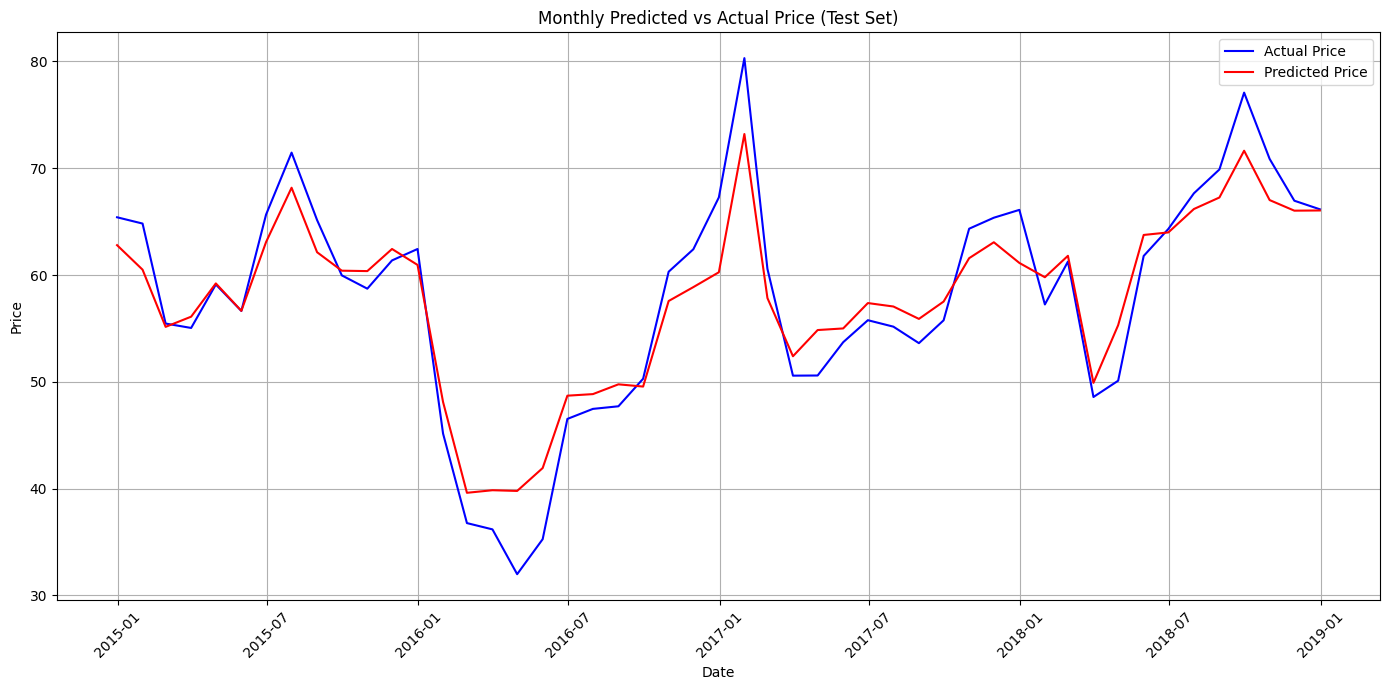

In [76]:
# Train a Random Forest Regressor model
model_rft = RandomForestRegressor(**best_params, random_state=42)
model_rft.fit(X_train_scaled_rft, y_train_rft)

# Predict on the validation set
y_pred_validation_rft = model_rft.predict(X_validation_scaled_rft)

# Evaluate the model on the validation set
mae_validation_rft = mean_absolute_error(y_validation_rft, y_pred_validation_rft)
r2_validation_rft = r2_score(y_validation_rft, y_pred_validation_rft)
adjusted_r2_validation_rft = 1 - (1 - r2_validation_rft) * (len(y_validation_rft) - 1) / (len(y_validation_rft) - X_validation_rft.shape[1] - 1)
mape_validation_rft = mean_absolute_percentage_error(y_validation_rft, y_pred_validation_rft)
rmse_validation_rft = np.sqrt(mean_squared_error(y_validation_rft, y_pred_validation_rft))

print('Validation for price actual')
print(f'Validation MAE for price: {mae_validation_rft}')
print(f'Validation R² for price: {r2_validation_rft}')
print(f'Validation Adjusted R² for price: {adjusted_r2_validation_rft}')
print(f'Validation MAPE for price: {mape_validation_rft}')
print(f'Validation RMSE for price: {rmse_validation_rft}')
print()

# Predict on the test set
y_pred_test_rft = model_rft.predict(X_test_scaled_rft)

# Evaluate the model on the test set
mae_test_rft = mean_absolute_error(y_test_rft, y_pred_test_rft)
r2_test_rft = r2_score(y_test_rft, y_pred_test_rft)
adjusted_r2_test_rft = 1 - (1 - r2_test_rft) * (len(y_test_rft) - 1) / (len(y_test_rft) - X_test_rft.shape[1] - 1)
mape_test_rft = mean_absolute_percentage_error(y_test_rft, y_pred_test_rft)
rmse_test_rft = np.sqrt(mean_squared_error(y_test_rft, y_pred_test_rft))

print('Test for price actual')
print(f'Test MAE for price: {mae_test_rft}')
print(f'Test R² for price: {r2_test_rft}')
print(f'Test Adjusted R² for price: {adjusted_r2_test_rft}')
print(f'Test MAPE for price: {mape_test_rft}')
print(f'Test RMSE for price: {rmse_test_rft}')

# Prediction on the test set
y_pred_test_rft = model_rft.predict(X_test_scaled_rft)

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted prices for the test set
results_test_df_rft = pd.DataFrame({
    'time': test['time'],
    'price_actual': y_test_rft,
    'price_predicted': y_pred_test_rft
})

# Resample the data monthly and calculate the mean
results_test_df_rft.set_index('time', inplace=True)
results_test_monthly_rft = results_test_df_rft.resample('M').mean()

# Plotting the results for the test set
plt.figure(figsize=(14, 7))
plt.plot(results_test_monthly_rft.index, results_test_monthly_rft['price_actual'], 'b-', label='Actual Price')
plt.plot(results_test_monthly_rft.index, results_test_monthly_rft['price_predicted'], 'r-', label='Predicted Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

**Gradient Boosting model for total load actual**

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train_load = train['total load actual']
X_validation = validation[features]
y_validation_load = validation['total load actual']
X_test = test[features]
y_test_load = test['total load actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor for 'total load actual'
model_load = GradientBoostingRegressor(random_state=42)
model_load.fit(X_train_scaled, y_train_load)

# Predict on the validation set
y_pred_validation_load = model_load.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation_load = mean_absolute_error(y_validation_load, y_pred_validation_load)
r2_validation_load = r2_score(y_validation_load, y_pred_validation_load)
adjusted_r2_validation_load = 1 - (1 - r2_validation_load) * (len(y_validation_load) - 1) / (len(y_validation_load) - X_validation.shape[1] - 1)
mape_validation_load = np.mean(np.abs((y_validation_load - y_pred_validation_load) / y_validation_load))
rmse_validation_load = np.sqrt(mean_squared_error(y_validation_load, y_pred_validation_load))

print('Validation for total load actual')
print(f'Validation MAE for total load actual: {mae_validation_load}')
print(f'Validation R² for total load actual: {r2_validation_load}')
print(f'Validation Adjusted R² for total load actual: {adjusted_r2_validation_load}')
print(f'Validation MAPE for total load actual: {mape_validation_load}')
print(f'Validation RMSE for total load actual: {rmse_validation_load}')

# Blank line between validation and test results
print()

# Predict on the test set
y_pred_test_load = model_load.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test_load = mean_absolute_error(y_test_load, y_pred_test_load)
r2_test_load = r2_score(y_test_load, y_pred_test_load)
adjusted_r2_test_load = 1 - (1 - r2_test_load) * (len(y_test_load) - 1) / (len(y_test_load) - X_test.shape[1] - 1)
mape_test_load = np.mean(np.abs((y_test_load - y_pred_test_load) / y_test_load))
rmse_test_load = np.sqrt(mean_squared_error(y_test_load, y_pred_test_load))

print('Test for total load actual')
print(f'Test MAE for total load actual: {mae_test_load}')
print(f'Test R² for total load actual: {r2_test_load}')
print(f'Test Adjusted R² for total load actual: {adjusted_r2_test_load}')
print(f'Test MAPE for total load actual: {mape_test_load}')
print(f'Test RMSE for total load actual: {rmse_test_load}')

Validation for total load actual
Validation MAE for total load actual: 307.60016361248597
Validation R² for total load actual: 0.9911780001630972
Validation Adjusted R² for total load actual: 0.9911672030027224
Validation MAPE for total load actual: 0.010672570868940022
Validation RMSE for total load actual: 432.0615375993403

Test for total load actual
Test MAE for total load actual: 308.7792762720196
Test R² for total load actual: 0.9903382614468028
Test Adjusted R² for total load actual: 0.990324464219242
Test MAPE for total load actual: 0.010749452231651314
Test RMSE for total load actual: 448.05289494325973


**For price model**

Validation for price actual
Validation MAE for price actual: 5.2398921768850935
Validation R² for price actual: 0.7026079168385073
Validation Adjusted R² for price actual: 0.7022196448409077
Validation MAPE for price actual: 0.10798878137194831
Validation RMSE for price actual: 7.7339463981386025

Test for price actual
Test MAE for price actual: 5.3889438523514
Test R² for price actual: 0.6879913735071495
Test Adjusted R² for price actual: 0.6875160675922789
Test MAPE for price actual: 0.11188656493507634
Test RMSE for price actual: 7.973732175433088


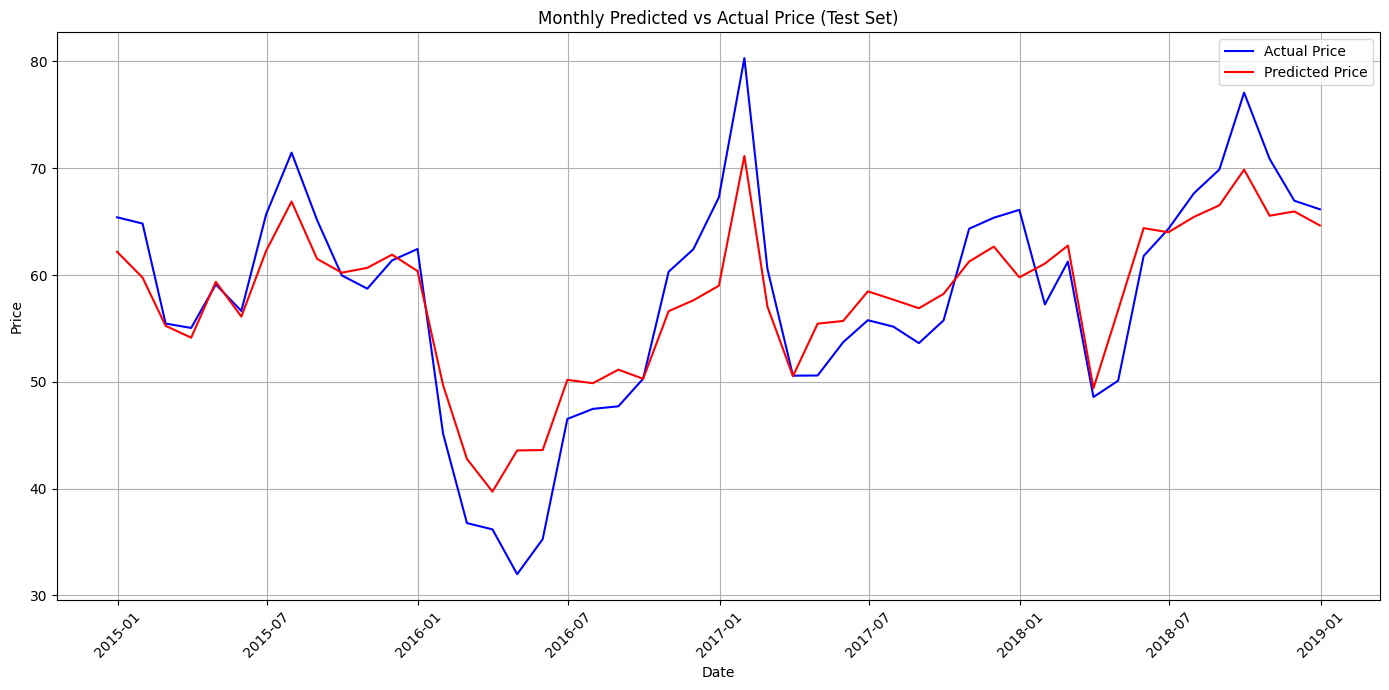

In [128]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption',
            'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead',
            'total load forecast', 'total load actual', 'price day ahead', 'wind_speed', 'wind_deg',
            'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train_gb = train[features]
y_train_gb = train['price actual']

X_validation_gb = validation[features]
y_validation_price_gb = validation['price actual']

X_test_gb = test[features]
y_test_price_gb = test['price actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_gb)
X_validation_scaled = scaler.transform(X_validation_gb)
X_test_scaled = scaler.transform(X_test_gb)

# Initialize and train the Gradient Boosting Regressor for 'price actual'
model_price = GradientBoostingRegressor(random_state=42)
model_price.fit(X_train_scaled, y_train_gb)

# Predict on the validation set
y_pred_validation_price = model_price.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation_price = mean_absolute_error(y_validation_price_gb, y_pred_validation_price)
r2_validation_price = r2_score(y_validation_price_gb, y_pred_validation_price)
adjusted_r2_validation_price = 1 - (1 - r2_validation_price) * (len(y_validation_price_gb) - 1) / (len(y_validation_price_gb) - X_validation_gb.shape[1] - 1)
mape_validation_price = np.mean(np.abs((y_validation_price_gb - y_pred_validation_price) / y_validation_price_gb))
rmse_validation_price = np.sqrt(mean_squared_error(y_validation_price_gb, y_pred_validation_price))

print('Validation for price actual')
print(f'Validation MAE for price actual: {mae_validation_price}')
print(f'Validation R² for price actual: {r2_validation_price}')
print(f'Validation Adjusted R² for price actual: {adjusted_r2_validation_price}')
print(f'Validation MAPE for price actual: {mape_validation_price}')
print(f'Validation RMSE for price actual: {rmse_validation_price}')
print()

# Predict on the test set
y_pred_test_price = model_price.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test_price = mean_absolute_error(y_test_price_gb, y_pred_test_price)
r2_test_price = r2_score(y_test_price_gb, y_pred_test_price)
adjusted_r2_test_price = 1 - (1 - r2_test_price) * (len(y_test_price_gb) - 1) / (len(y_test_price_gb) - X_test_gb.shape[1] - 1)
mape_test_price = np.mean(np.abs((y_test_price_gb - y_pred_test_price) / y_test_price_gb))
rmse_test_price = np.sqrt(mean_squared_error(y_test_price_gb, y_pred_test_price))

print('Test for price actual')
print(f'Test MAE for price actual: {mae_test_price}')
print(f'Test R² for price actual: {r2_test_price}')
print(f'Test Adjusted R² for price actual: {adjusted_r2_test_price}')
print(f'Test MAPE for price actual: {mape_test_price}')
print(f'Test RMSE for price actual: {rmse_test_price}')

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted prices for the test set
results_test_df = pd.DataFrame({
    'time': test['time'],
    'price_actual': y_test_price_gb,
    'price_predicted': y_pred_test_price
})

# Resample the data monthly and calculate the mean
results_test_df.set_index('time', inplace=True)
results_test_monthly = results_test_df.resample('M').mean()

# Plotting the results for the test set
plt.figure(figsize=(14, 7))
plt.plot(results_test_monthly.index, results_test_monthly['price_actual'], 'b-', label='Actual Price')
plt.plot(results_test_monthly.index, results_test_monthly['price_predicted'], 'r-', label='Predicted Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


**Gradient Boosting with parameter tuning for load model**

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming df4 is your dataframe and contains the target variables
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train_load = train['total load actual']

X_validation = validation[features]
y_validation_load = validation['total load actual']

X_test = test[features]
y_test_load = test['total load actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Define the new parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],

}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_load)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Use the best parameters to train the model
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train_load)

# Predict on the validation set
y_pred_validation_load = best_model.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation_load = mean_absolute_error(y_validation_load, y_pred_validation_load)
r2_validation_load = r2_score(y_validation_load, y_pred_validation_load)
adjusted_r2_validation_load = 1 - (1 - r2_validation_load) * (len(y_validation_load) - 1) / (len(y_validation_load) - X_validation.shape[1] - 1)
mape_validation_load = np.mean(np.abs((y_validation_load - y_pred_validation_load) / y_validation_load))
rmse_validation_load = np.sqrt(mean_squared_error(y_validation_load, y_pred_validation_load))

print('Validation for total load actual')
print(f'Validation MAE for total load actual: {mae_validation_load}')
print(f'Validation R² for total load actual: {r2_validation_load}')
print(f'Validation Adjusted R² for total load actual: {adjusted_r2_validation_load}')
print(f'Validation MAPE for total load actual: {mape_validation_load}')
print(f'Validation RMSE for total load actual: {rmse_validation_load}')

# Blank line between validation and test results
print()

# Predict on the test set
y_pred_test_load = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test_load = mean_absolute_error(y_test_load, y_pred_test_load)
r2_test_load = r2_score(y_test_load, y_pred_test_load)
adjusted_r2_test_load = 1 - (1 - r2_test_load) * (len(y_test_load) - 1) / (len(y_test_load) - X_test.shape[1] - 1)
mape_test_load = np.mean(np.abs((y_test_load - y_pred_test_load) / y_test_load))
rmse_test_load = np.sqrt(mean_squared_error(y_test_load, y_pred_test_load))

print('Test for total load actual')
print(f'Test MAE for total load actual: {mae_test_load}')
print(f'Test R² for total load actual: {r2_test_load}')
print(f'Test Adjusted R² for total load actual: {adjusted_r2_test_load}')
print(f'Test MAPE for total load actual: {mape_test_load}')
print(f'Test RMSE for total load actual: {rmse_test_load}')


Best parameters found: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Validation for total load actual
Validation MAE for total load actual: 299.7289126977285
Validation R² for total load actual: 0.9917666048837489
Validation Adjusted R² for total load actual: 0.9917565281110055
Validation MAPE for total load actual: 0.010444815760090166
Validation RMSE for total load actual: 417.39915245895315

Test for total load actual
Test MAE for total load actual: 304.22524889662077
Test R² for total load actual: 0.9906853409242584
Test Adjusted R² for total load actual: 0.9906720393357078
Test MAPE for total load actual: 0.010624415169424185
Test RMSE for total load actual: 439.9315704973109


parameter tuning for price model

In [131]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming df4 is your dataframe and contains the target variable
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption',
            'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead',
            'total load forecast', 'total load actual', 'wind_speed', 'wind_deg', 'weekday', 'weekend',
            'month_name_March']

# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train_gbt = train[features]
y_train_price_gbt = train['price actual']

X_validation_gbt = validation[features]
y_validation_price_gbt = validation['price actual']

X_test_gbt = test[features]
y_test_price_gbt = test['price actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_gbt)
X_validation_scaled = scaler.transform(X_validation_gbt)
X_test_scaled = scaler.transform(X_test_gbt)




In [51]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_price_gbt)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

Best parameters found: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


Validation for priced actual
Validation MAE for price actual: 4.14271627042012
Validation R² for price actual: 0.7951540661946839
Validation Adjusted R² for price actual: 0.7948866214830653
Validation MAPE for price actual: 0.08388278453369598
Validation RMSE for price actual: 6.418745109720355

Test for price actual
Test MAE for price actual: 4.20306066709919
Test R² for price actual: 0.7926182230154943
Test Adjusted R² for price actual: 0.7923023029515363
Test MAPE for price actual: 0.08524048042600126
Test RMSE for price actual: 6.5007526132919375


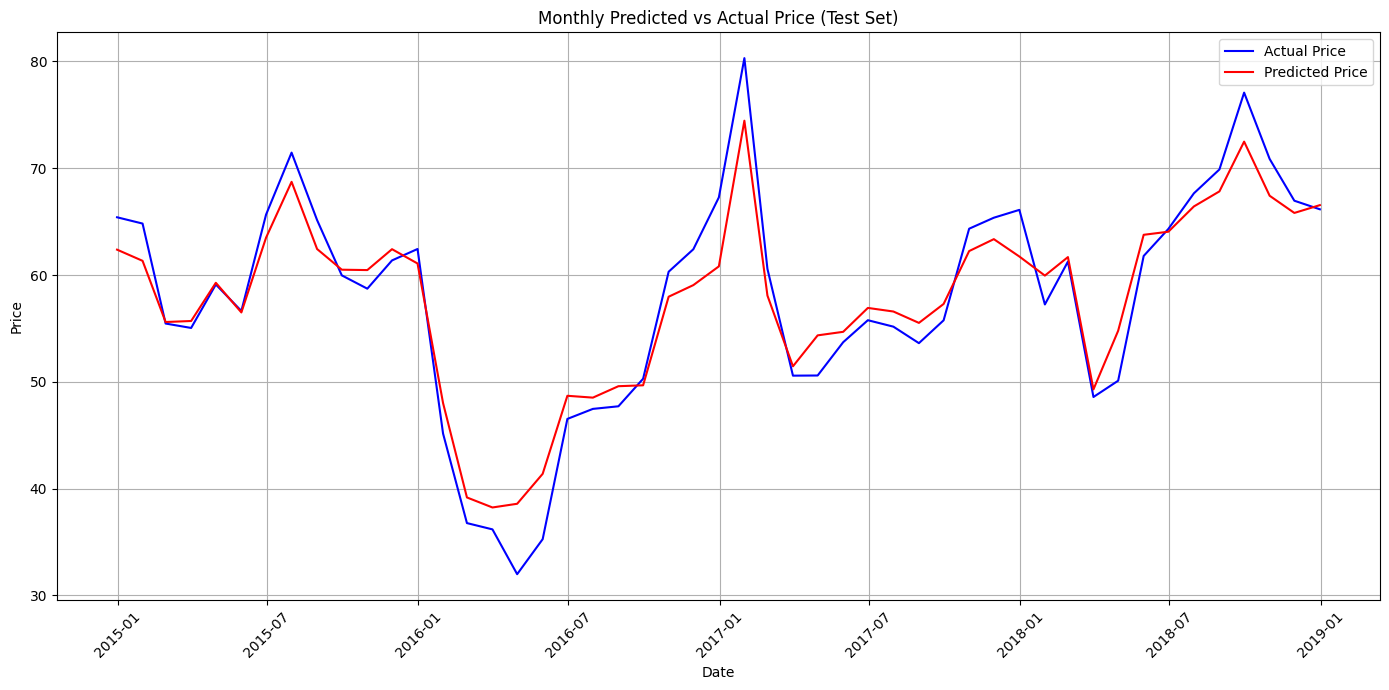

In [78]:
# Use the best parameters to train the model
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train_price_gbt)

# Predict on the validation set
y_pred_validation_price = best_model.predict(X_validation_scaled)

# Evaluate the model on the validation set
mae_validation_price = mean_absolute_error(y_validation_price_gbt, y_pred_validation_price)
r2_validation_price = r2_score(y_validation_price_gbt, y_pred_validation_price)
adjusted_r2_validation_price = 1 - (1 - r2_validation_price) * (len(y_validation_price_gbt) - 1) / (len(y_validation_price_gbt) - X_validation_gbt.shape[1] - 1)
mape_validation_price = np.mean(np.abs((y_validation_price_gbt - y_pred_validation_price) / y_validation_price_gbt))
rmse_validation_price = np.sqrt(mean_squared_error(y_validation_price_gbt, y_pred_validation_price))

print('Validation for price actual')
print(f'Validation MAE for price actual: {mae_validation_price}')
print(f'Validation R² for price actual: {r2_validation_price}')
print(f'Validation Adjusted R² for price actual: {adjusted_r2_validation_price}')
print(f'Validation MAPE for price actual: {mape_validation_price}')
print(f'Validation RMSE for price actual: {rmse_validation_price}')
print()

# Predict on the test set
y_pred_test_price = best_model.predict(X_test_scaled)

# Evaluate the model on the test set
mae_test_price = mean_absolute_error(y_test_price_gbt, y_pred_test_price)
r2_test_price = r2_score(y_test_price_gbt, y_pred_test_price)
adjusted_r2_test_price = 1 - (1 - r2_test_price) * (len(y_test_price_gbt) - 1) / (len(y_test_price_gbt) - X_test_gbt.shape[1] - 1)
mape_test_price = np.mean(np.abs((y_test_price_gbt - y_pred_test_price) / y_test_price_gbt))
rmse_test_price = np.sqrt(mean_squared_error(y_test_price_gbt, y_pred_test_price))

print('Test for price actual')
print(f'Test MAE for price actual: {mae_test_price}')
print(f'Test R² for price actual: {r2_test_price}')
print(f'Test Adjusted R² for price actual: {adjusted_r2_test_price}')
print(f'Test MAPE for price actual: {mape_test_price}')
print(f'Test RMSE for price actual: {rmse_test_price}')

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted prices for the test set
results_test_df = pd.DataFrame({
    'time': test['time'],
    'price_actual': y_test_price_gbt,
    'price_predicted': y_pred_test_price
})

# Resample the data monthly and calculate the mean
results_test_df.set_index('time', inplace=True)
results_test_monthly = results_test_df.resample('M').mean()

# Plotting the results for the test set
plt.figure(figsize=(14, 7))
plt.plot(results_test_monthly.index, results_test_monthly['price_actual'], 'b-', label='Actual Price')
plt.plot(results_test_monthly.index, results_test_monthly['price_predicted'], 'r-', label='Predicted Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
pip install tensorflow

**LSTM MODEL FOR LOAD**

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled, X_validation_scaled, X_test_scaled, y_train_load, y_validation_load, y_test_load are defined

# Define features and target variables for total load actual
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Select features for total load actual
X_train_load = X_train_scaled[:, [features.index(col) for col in features]]
X_validation_load = X_validation_scaled[:, [features.index(col) for col in features]]
X_test_load = X_test_scaled[:, [features.index(col) for col in features]]

# Reshape data to 3D for LSTM
X_train_load = X_train_load.reshape((X_train_load.shape[0], X_train_load.shape[1], 1))
X_validation_load = X_validation_load.reshape((X_validation_load.shape[0], X_validation_load.shape[1], 1))
X_test_load = X_test_load.reshape((X_test_load.shape[0], X_test_load.shape[1], 1))

# Define LSTM model architecture for total load actual
model_load_lstm = Sequential()
model_load_lstm.add(LSTM(100, activation='relu', input_shape=(X_train_load.shape[1], 1), return_sequences=True))
model_load_lstm.add(Dropout(0.2))
model_load_lstm.add(LSTM(50, activation='relu'))
model_load_lstm.add(Dropout(0.2))
model_load_lstm.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_load_lstm.compile(optimizer=optimizer, loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model for total load actual
history_load_lstm = model_load_lstm.fit(X_train_load, y_train_load, epochs=50, batch_size=32, validation_data=(X_validation_load, y_validation_load), callbacks=[early_stopping], verbose=1)

# Predict on the validation set for total load actual
y_pred_validation_load_lstm = model_load_lstm.predict(X_validation_load).flatten()

# Evaluate the model on the validation set for total load actual
mae_validation_load_lstm = mean_absolute_error(y_validation_load, y_pred_validation_load_lstm)
r2_validation_load_lstm = r2_score(y_validation_load, y_pred_validation_load_lstm)
adjusted_r2_validation_load_lstm = 1 - (1 - r2_validation_load_lstm) * (len(y_validation_load) - 1) / (len(y_validation_load) - X_validation_load.shape[1] - 1)
mape_validation_load_lstm = np.mean(np.abs((y_validation_load - y_pred_validation_load_lstm) / y_validation_load))
rmse_validation_load_lstm = np.sqrt(mean_squared_error(y_validation_load, y_pred_validation_load_lstm))

print('Validation for total load actual (LSTM)')
print(f'Validation MAE for total load actual: {mae_validation_load_lstm:.2f}')
print(f'Validation R² for total load actual: {r2_validation_load_lstm:.2f}')
print(f'Validation Adjusted R² for total load actual: {adjusted_r2_validation_load_lstm:.2f}')
print(f'Validation MAPE for total load actual: {mape_validation_load_lstm:.2f}')
print(f'Validation RMSE for total load actual: {rmse_validation_load_lstm:.2f}')

# Predict on the test set for total load actual
y_pred_test_load_lstm = model_load_lstm.predict(X_test_load).flatten()

# Evaluate the model on the test set for total load actual
mae_test_load_lstm = mean_absolute_error(y_test_load, y_pred_test_load_lstm)
r2_test_load_lstm = r2_score(y_test_load, y_pred_test_load_lstm)
adjusted_r2_test_load_lstm = 1 - (1 - r2_test_load_lstm) * (len(y_test_load) - 1) / (len(y_test_load) - X_test_load.shape[1] - 1)
mape_test_load_lstm = np.mean(np.abs((y_test_load - y_pred_test_load_lstm) / y_test_load))
rmse_test_load_lstm = np.sqrt(mean_squared_error(y_test_load, y_pred_test_load_lstm))

print('Test for total load actual (LSTM)')
print(f'Test MAE for total load actual: {mae_test_load_lstm:.2f}')
print(f'Test R² for total load actual: {r2_test_load_lstm:.2f}')
print(f'Test Adjusted R² for total load actual: {adjusted_r2_test_load_lstm:.2f}')
print(f'Test MAPE for total load actual: {mape_test_load_lstm:.2f}')
print(f'Test RMSE for total load actual: {rmse_test_load_lstm:.2f}')


Epoch 1/50
384/384 [==============================] - 18s 36ms/step - loss: 185233952.0000 - val_loss: 19940570.0000
Epoch 2/50
384/384 [==============================] - 13s 34ms/step - loss: 26137952.0000 - val_loss: 13569123.0000
Epoch 3/50
384/384 [==============================] - 13s 33ms/step - loss: 23918376.0000 - val_loss: 24689516.0000
Epoch 4/50
384/384 [==============================] - 13s 35ms/step - loss: 22271160.0000 - val_loss: 12853594.0000
Epoch 5/50
384/384 [==============================] - 14s 35ms/step - loss: 19402312.0000 - val_loss: 7499877.5000
Epoch 6/50
384/384 [==============================] - 14s 37ms/step - loss: 13335497.0000 - val_loss: 2933921.2500
Epoch 7/50
384/384 [==============================] - 14s 36ms/step - loss: 11118178.0000 - val_loss: 1994727.7500
Epoch 8/50
384/384 [==============================] - 13s 35ms/step - loss: 10612187.0000 - val_loss: 3326863.2500
Epoch 9/50
384/384 [==============================] - 12s 30ms/step - loss:

LSTM MODEL FOR PRICE

In [58]:
# Define features and target variables for price actual
features_price = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable', 'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Select features for price actual
X_train_price = X_train_scaled[:, [features.index(col) for col in features_price]]
X_validation_price = X_validation_scaled[:, [features.index(col) for col in features_price]]
X_test_price = X_test_scaled[:, [features.index(col) for col in features_price]]

# Define LSTM model architecture for price actual
model_price_lstm = Sequential()
model_price_lstm.add(LSTM(100, activation='relu', input_shape=(X_train_price.shape[1], 1), return_sequences=True))  # Adjust input_shape based on the number of features selected
model_price_lstm.add(Dropout(0.2))
model_price_lstm.add(LSTM(50, activation='relu'))
model_price_lstm.add(Dropout(0.2))
model_price_lstm.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_price_lstm.compile(optimizer=optimizer, loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model for price actual
history_price_lstm = model_price_lstm.fit(X_train_price, y_train_price, epochs=50, batch_size=32, validation_data=(X_validation_price, y_validation_price), callbacks=[early_stopping], verbose=1)

# Predict on the validation set for price actual
y_pred_validation_price_lstm = model_price_lstm.predict(X_validation_price).flatten()

# Evaluate the model on the validation set for price actual
mae_validation_price_lstm = mean_absolute_error(y_validation_price, y_pred_validation_price_lstm)
r2_validation_price_lstm = r2_score(y_validation_price, y_pred_validation_price_lstm)
adjusted_r2_validation_price_lstm = 1 - (1 - r2_validation_price_lstm) * (len(y_validation_price) - 1) / (len(y_validation_price) - X_validation_price.shape[1] - 1)
mape_validation_price_lstm = np.mean(np.abs((y_validation_price - y_pred_validation_price_lstm) / y_validation_price))
rmse_validation_price_lstm = np.sqrt(mean_squared_error(y_validation_price, y_pred_validation_price_lstm))

print('Validation for price actual (LSTM)')
print(f'Validation MAE for price actual: {mae_validation_price_lstm:.2f}')
print(f'Validation R² for price actual: {r2_validation_price_lstm:.2f}')
print(f'Validation Adjusted R² for price actual: {adjusted_r2_validation_price_lstm:.2f}')
print(f'Validation MAPE for price actual: {mape_validation_price_lstm:.2f}')
print(f'Validation RMSE for price actual: {rmse_validation_price_lstm:.2f}')

# Blank line between price actual and test results
print()

# Predict on the test set for price actual
y_pred_test_price_lstm = model_price_lstm.predict(X_test_price).flatten()

# Evaluate the model on the test set for price actual
mae_test_price_lstm = mean_absolute_error(y_test_price, y_pred_test_price_lstm)
r2_test_price_lstm = r2_score(y_test_price, y_pred_test_price_lstm)
adjusted_r2_test_price_lstm = 1 - (1 - r2_test_price_lstm) * (len(y_test_price) - 1) / (len(y_test_price) - X_test_price.shape[1] - 1)
mape_test_price_lstm = np.mean(np.abs((y_test_price - y_pred_test_price_lstm) / y_test_price))
rmse_test_price_lstm = np.sqrt(mean_squared_error(y_test_price, y_pred_test_price_lstm))

print('Test for price actual (LSTM)')
print(f'Test MAE for price actual: {mae_test_price_lstm:.2f}')
print(f'Test R² for price actual: {r2_test_price_lstm:.2f}')
print(f'Test Adjusted R² for price actual: {adjusted_r2_test_price_lstm:.2f}')
print(f'Test MAPE for price actual: {mape_test_price_lstm:.2f}')
print(f'Test RMSE for price actual: {rmse_test_price_lstm:.2f}')

Epoch 1/50
384/384 [==============================] - 17s 35ms/step - loss: 566.4343 - val_loss: 149.6828
Epoch 2/50
384/384 [==============================] - 11s 29ms/step - loss: 209.8298 - val_loss: 142.4553
Epoch 3/50
384/384 [==============================] - 12s 30ms/step - loss: 200.3171 - val_loss: 149.5354
Epoch 4/50
384/384 [==============================] - 12s 33ms/step - loss: 190.0593 - val_loss: 194.0045
Epoch 5/50
384/384 [==============================] - 12s 32ms/step - loss: 188.8472 - val_loss: 167.7803
Epoch 6/50
384/384 [==============================] - 12s 31ms/step - loss: 186.7482 - val_loss: 136.5862
Epoch 7/50
384/384 [==============================] - 14s 36ms/step - loss: 175.5543 - val_loss: 130.7785
Epoch 8/50
384/384 [==============================] - 13s 33ms/step - loss: 175.0119 - val_loss: 126.6509
Epoch 9/50
384/384 [==============================] - 12s 31ms/step - loss: 174.0831 - val_loss: 122.2631
Epoch 10/50
384/384 [=========================

**FINALIZE MODEL**

Comparison for all values for all models

Total Load Actual

In [133]:
data = {
    'Model': [
        'Linear Regression', 'Random Forest', 'Random Forest (Tuned)',
        'Gradient Descent', 'Gradient Descent (Tuned)', 'LSTM'
    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual','total load actual', 'total load actual', 'total load actual'],

    'Load Prediction': ['Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set'],
    'MAE': [312.79034486, 310.8393953, 311.8402786, 308.1296294, 303.3579244,387.260000],
    'RMSE': [457.5436542, 453.34622141, 453.5193657, 446.9855566, 440.6095463,510.310000],
    'MAPE': [0.010887868, 0.0108318999, 0.010846778, 0.010733439, 0.01060221,0.010000],
    'R²':  [0.98992461, 0.990108624, 0.99010106, 0.99038423, 0.990656609,0.9900000],
    'Adjusted R²':[0.9899083, 0.990090725, 0.9900869, 0.9903705, 0.9906432,0.990000]
}

# Create the DataFrame
df = pd.DataFrame(data)



# Display the DataFrame with the specified heading
print("Comparison of Total Load Actual Models")
df

Comparison of Total Load Actual Models


,Model,prediction,Load Prediction,MAE,RMSE,MAPE,R²,Adjusted R²
0,Linear Regression,total load actual,Test Set,312.790345,457.543654,0.010888,0.989925,0.989908
1,Random Forest,total load actual,Test Set,310.839395,453.346221,0.010832,0.990109,0.990091
2,Random Forest (Tuned),total load actual,Test Set,311.840279,453.519366,0.010847,0.990101,0.990087
3,Gradient Descent,total load actual,Test Set,308.129629,446.985557,0.010733,0.990384,0.990371
4,Gradient Descent (Tuned),total load actual,Test Set,303.357924,440.609546,0.010602,0.990657,0.990643
5,LSTM,total load actual,Test Set,387.260000,510.310000,0.010000,0.990000,0.990000


**for load model we finalize the Hyperparameter of Gradient Boosting model beacuse in compare to other models its produce the less mape value is 0.010602 and the lowest MAE value :303.3579**

Price Actual

In [134]:
data = {
    'Model': [
        'Linear Regression', 'Random Forest', 'Random Forest (Tuned)',
        'Gradient Descent', 'Gradient Descent (Tuned)', 'LSTM'
    ],
    'prediction': ['price actual', 'price actual', 'price actual','price actual', 'price actual', 'price actual'],

    'Load Prediction': ['Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set'],
    'MAE': [6.24308906, 4.5725999, 4.4112723, 5.37205008, 5.54524441,6.93000000],
    'RMSE': [8.9319944, 7.097485785, 6.869381, 7.9447031, 7.5111770897,9.1000000],
    'MAPE':[0.129559354, 0.09485689, 0.09083324, 0.1113195, 0.11094516,0.14000000],
    'R²': [0.608492, 0.752797774, 0.7684320015, 0.69035905, 0.72314057, 0.59000000],
    'Adjusted R²': [0.6078959, 0.75242119, 0.7680792, 0.68978717, 0.7222745, 0.59000000]
}

# Create the DataFrame
df = pd.DataFrame(data)



# Display the DataFrame with the specified heading
print("Comparison of Price Actual Models")
df

Comparison of Price Actual Models


,Model,prediction,Load Prediction,MAE,RMSE,MAPE,R²,Adjusted R²
0,Linear Regression,price actual,Test Set,6.243089,8.931994,0.129559,0.608492,0.607896
1,Random Forest,price actual,Test Set,4.572600,7.097486,0.094857,0.752798,0.752421
2,Random Forest (Tuned),price actual,Test Set,4.411272,6.869381,0.090833,0.768432,0.768079
3,Gradient Descent,price actual,Test Set,5.372050,7.944703,0.111320,0.690359,0.689787
4,Gradient Descent (Tuned),price actual,Test Set,5.545244,7.511177,0.110945,0.723141,0.722275
5,LSTM,price actual,Test Set,6.930000,9.100000,0.140000,0.590000,0.590000


for price model we finalize the **Hyperparameter of Random Forest** with the best MAPE value in comparison to others is : 0.090833

MAE evaluation is : 4.411 as compare to other it is the lowest value

RMSE value : 6.869








**Important Features**

Importannt features of Gradient boosting model for load

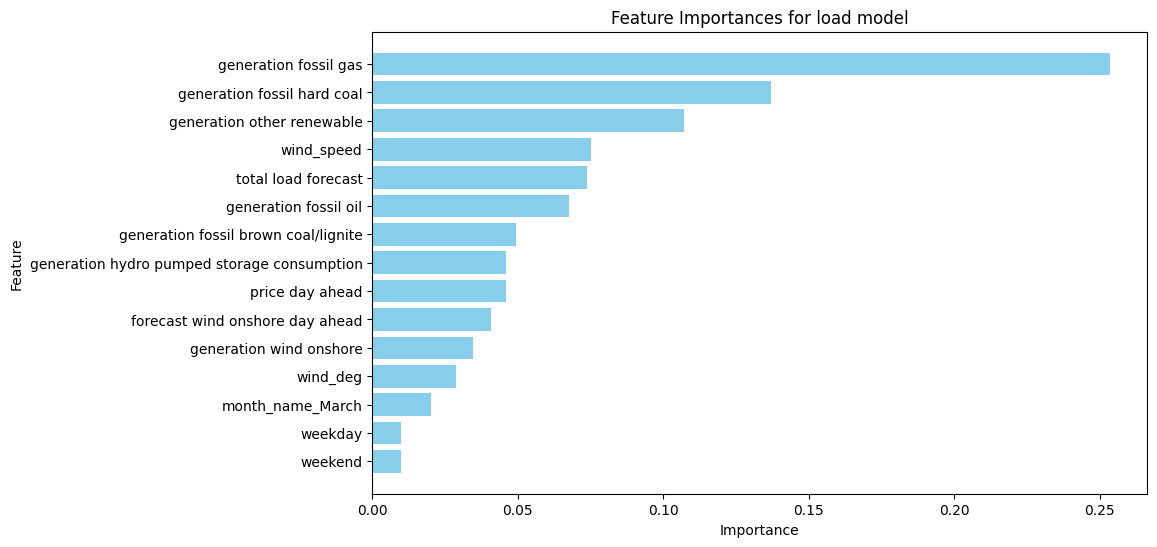

In [61]:


# Get feature importances from the best_model
feature_importances = best_model.feature_importances_

# Match feature importances with feature names
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for load model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Important features for Random forest model for price

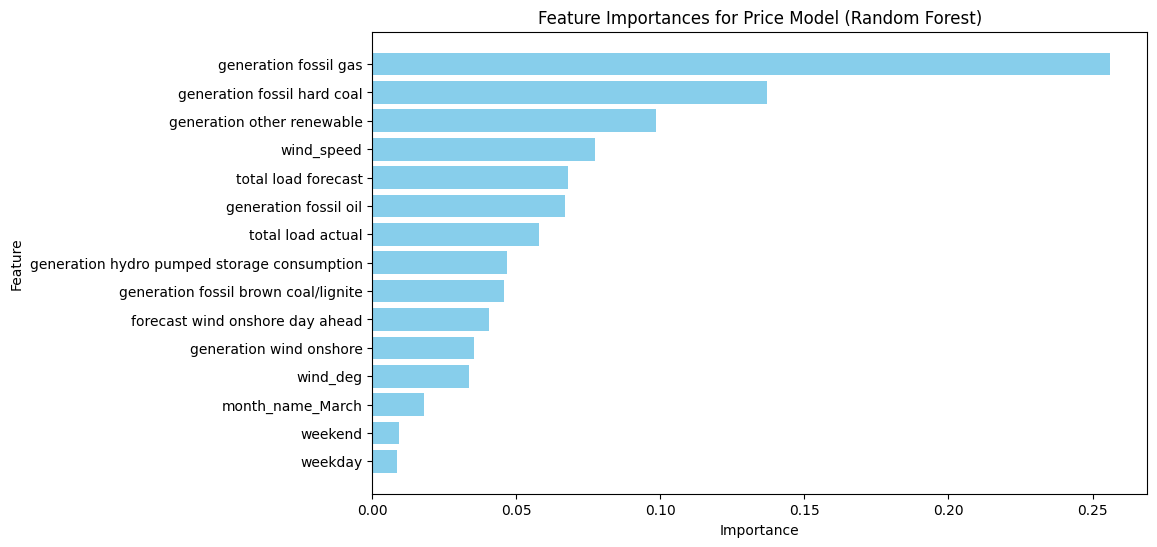

In [62]:
# Define the features
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable',
            'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Assuming df4 is your dataframe and contains the target variable
# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['price actual']

X_validation = validation[features]
y_validation = validation['price actual']

X_test = test[features]
y_test = test['price actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Match feature importances with feature names
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Price Model (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

plots for selected model of actual vs predicted values

plot for price model of hyperparameter Random Forest

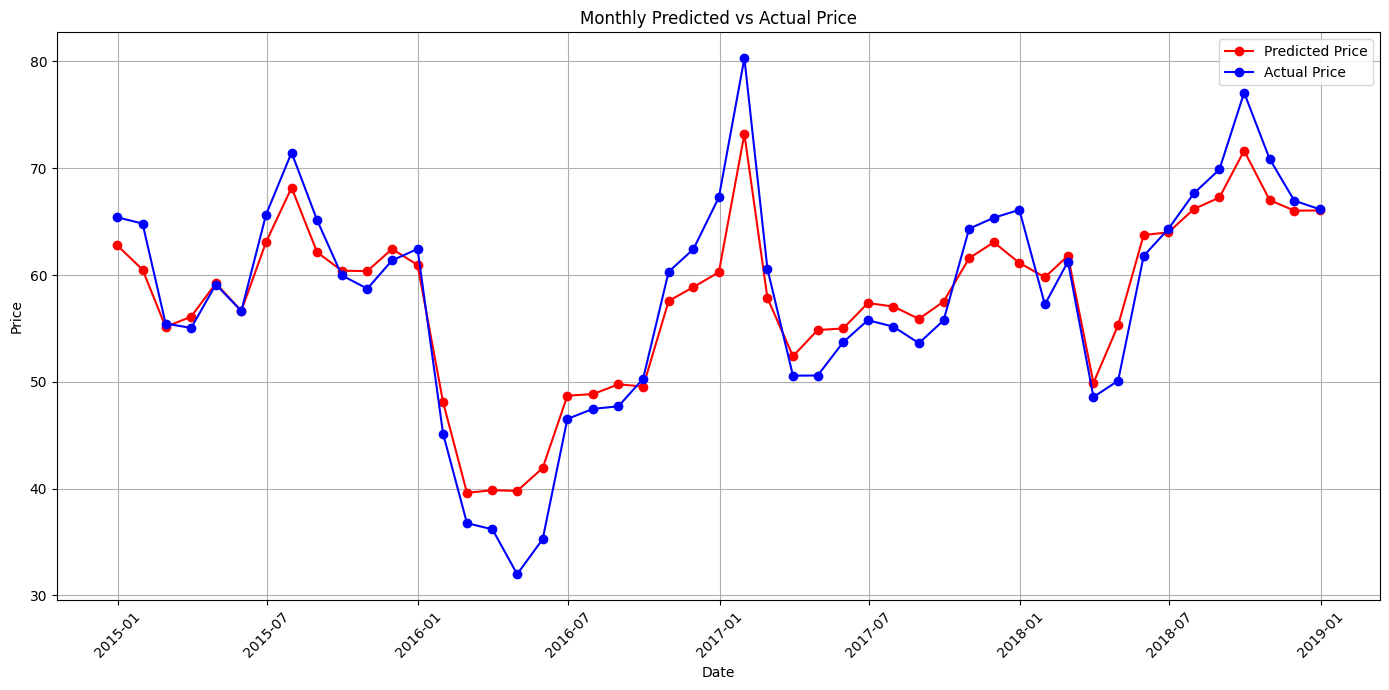

In [66]:
# Assuming df4 is your dataframe and contains the target variable
features = ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
            'generation fossil oil', 'generation hydro pumped storage consumption', 'generation other renewable',
            'generation wind onshore', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual',
            'price day ahead', 'wind_speed', 'wind_deg', 'weekday', 'weekend', 'month_name_March']

# Split the dataset into training and test sets
train_temp, test = train_test_split(df4, test_size=0.30, random_state=42)
train, validation = train_test_split(train_temp, test_size=0.5, random_state=42)

# Extract the features and target variables for each set
X_train = train[features]
y_train = train['price actual']

X_validation = validation[features]
y_validation = validation['price actual']

X_test = test[features]
y_test = test['price actual']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set to evaluate the model
y_pred_validation = model.predict(X_validation_scaled)


# Create a DataFrame to hold the actual and predicted prices for the test set
results_df = pd.DataFrame({
    'time': merged_dataset['time'].iloc[y_test.index],  # Assuming 'time' is the index in test
    'price_predicted': y_pred_test,
    'price_actual': y_test
})

results_df.set_index('time', inplace=True)

# Resample the data monthly and calculate the mean
results_monthly = results_df.resample('M').mean()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(results_monthly.index, results_monthly['price_predicted'], 'r-o', label='Predicted Price')
plt.plot(results_monthly.index, results_monthly['price_actual'], 'b-o', label='Actual Price')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


for load model with hyperparameter Gradient Boosting model



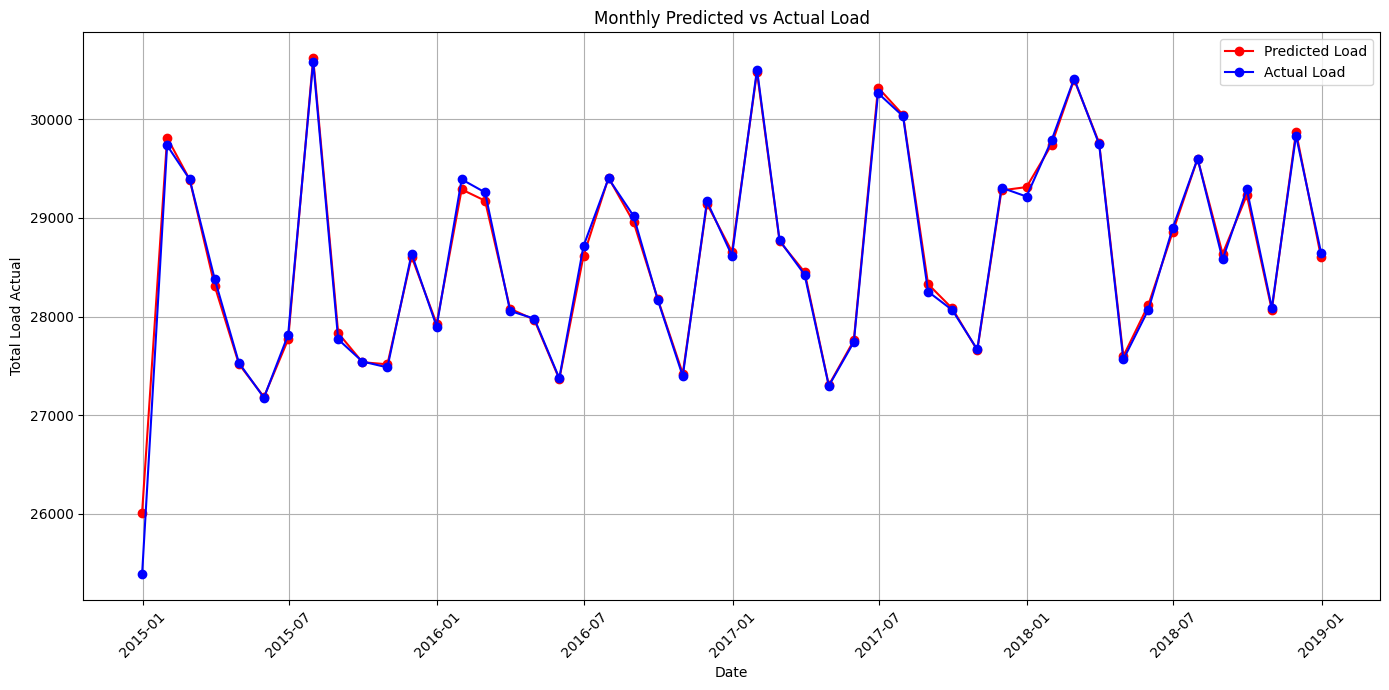

In [67]:
# Add the predicted values to the test DataFrame
test['y_pred_test_load'] = y_pred_test_load

# Convert the 'time' column to datetime if it's not already
test['time'] = pd.to_datetime(test['time'])

# Create a DataFrame to hold the actual and predicted loads for the test set
results_df = pd.DataFrame({
    'time': test['time'],
    'load_predicted': y_pred_test_load,
    'load_actual': y_test_load
})

results_df.set_index('time', inplace=True)

# Resample the data monthly and calculate the mean
results_monthly = results_df.resample('M').mean()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(results_monthly.index, results_monthly['load_predicted'], 'r-o', label='Predicted Load')
plt.plot(results_monthly.index, results_monthly['load_actual'], 'b-o', label='Actual Load')

# Formatting the plot
plt.title('Monthly Predicted vs Actual Load')
plt.xlabel('Date')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()